In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split

In [2]:
#Read in data
df = pd.read_csv('data.csv')

In [3]:
# View dimensions
df.shape

(6819, 96)

In [3]:
X2 = df.iloc[:,1:]
y2 = df.iloc[:,0]

In [17]:
# Data Summary Function
def getDfSummary(input_data):
    # Place your code here
    output_data = input_data.describe()
    output_data = output_data.transpose()
    nans = pd.DataFrame(input_data.isnull().sum())
    nans = nans.rename(columns={0:'number_nan'})
    uniq = pd.DataFrame(input_data.nunique())
    uniq = uniq.rename(columns={0:'number_distinct'})
    output_data = output_data.join(nans)
    output_data = output_data.join(uniq)
    return output_data
getDfSummary(X)

,count,mean,std,min,25%,50%,75%,max,number_nan,number_distinct
ROA(C) before interest and depreciation before interest,6819.0,0.505180,0.060686,0.0,0.476527,0.502706,0.535563,1.0,0,3333
ROA(A) before interest and % after tax,6819.0,0.558625,0.065620,0.0,0.535543,0.559802,0.589157,1.0,0,3151
ROA(B) before interest and depreciation after tax,6819.0,0.553589,0.061595,0.0,0.527277,0.552278,0.584105,1.0,0,3160
Operating Gross Margin,6819.0,0.607948,0.016934,0.0,0.600445,0.605997,0.613914,1.0,0,3781
Realized Sales Gross Margin,6819.0,0.607929,0.016916,0.0,0.600434,0.605976,0.613842,1.0,0,3788
...,...,...,...,...,...,...,...,...,...,...
Liability to Equity,6819.0,0.280365,0.014463,0.0,0.276944,0.278778,0.281449,1.0,0,6819
Degree of Financial Leverage (DFL),6819.0,0.027541,0.015668,0.0,0.026791,0.026808,0.026913,1.0,0,6240
Interest Coverage Ratio (Interest expense to EBIT),6819.0,0.565358,0.013214,0.0,0.565158,0.565252,0.565725,1.0,0,6240
Net Income Flag,6819.0,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.0,0,1


In [18]:
summary = getDfSummary(X)

In [461]:
# Features with values greater than 1
mal = list(summary[summary['max']>1].index)

In [463]:
df[mal]

,Operating Expense Rate,Research and development expense rate,Interest-bearing debt interest rate,Revenue Per Share (Yuan ¥),Total Asset Growth Rate,Net Value Growth Rate,Current Ratio,Quick Ratio,Total debt/Total net worth,Accounts Receivable Turnover,...,Allocation rate per person,Quick Assets/Current Liability,Cash/Current Liability,Inventory/Current Liability,Long-term Liability to Current Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Total assets to GNP price
0,1.256969e-04,0.000000e+00,7.250725e-04,0.017560,4.980000e+09,0.000327,0.002259,0.001208,0.021266,0.001814,...,0.037135,0.001997,1.473360e-04,0.001036,2.559237e-02,7.010000e+08,6.550000e+09,4.580000e+08,0.424206,0.009219
1,2.897851e-04,0.000000e+00,6.470647e-04,0.021144,6.110000e+09,0.000443,0.006016,0.004039,0.012502,0.001286,...,0.012335,0.004136,1.383910e-03,0.005210,2.394682e-02,1.065198e-04,7.700000e+09,2.490000e+09,0.468828,0.008323
2,2.361297e-04,2.550000e+07,7.900790e-04,0.005944,7.280000e+09,0.000396,0.011543,0.005348,0.021248,0.001495,...,0.141016,0.006302,5.340000e+09,0.013879,3.715116e-03,1.791094e-03,1.022676e-03,7.610000e+08,0.276179,0.040003
3,1.078888e-04,0.000000e+00,4.490449e-04,0.014368,4.880000e+09,0.000382,0.004194,0.002896,0.009572,0.001966,...,0.021320,0.002961,1.010646e-03,0.003540,2.216520e-02,8.140000e+09,6.050000e+09,2.030000e+09,0.559144,0.003252
4,7.890000e+09,0.000000e+00,6.860686e-04,0.029690,5.510000e+09,0.000439,0.006022,0.003727,0.005150,0.001449,...,0.023988,0.004275,6.804636e-04,0.004869,0.000000e+00,6.680000e+09,5.050000e+09,8.240000e+08,0.309555,0.003878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,1.510213e-04,4.500000e+09,1.790179e-04,0.020766,7.070000e+09,0.000450,0.010451,0.005457,0.006655,0.000690,...,0.006312,0.005469,5.071548e-03,0.013212,1.792237e-03,2.294154e-04,1.244230e-04,1.077940e-04,0.400338,0.000466
6815,5.220000e+09,1.440000e+09,2.370237e-04,0.023050,5.220000e+09,0.000445,0.009259,0.006741,0.004623,0.000655,...,0.003401,0.006790,4.727181e-03,0.006730,2.204673e-03,1.517299e-04,1.173396e-04,7.710000e+09,0.096136,0.001959
6816,2.509312e-04,1.039086e-04,0.000000e+00,0.044255,5.990000e+09,0.000435,0.038424,0.035112,0.001392,0.001510,...,0.002774,0.035531,8.821248e-02,0.007810,0.000000e+00,1.762272e-04,1.749713e-04,4.074263e-04,0.055509,0.002840
6817,1.236154e-04,2.510000e+09,2.110211e-04,0.031535,7.250000e+09,0.000529,0.012782,0.007256,0.003816,0.000716,...,0.007489,0.007753,7.133218e-03,0.013334,3.200000e+09,2.135940e-04,1.351937e-04,1.165392e-04,0.246805,0.002837


In [444]:
# Checking for negative feature values
summary[summary['min']<0].shape

(0, 10)

In [23]:
# Checking for constant features
summary[summary['number_distinct']<=1]

,count,mean,std,min,25%,50%,75%,max,number_nan,number_distinct
Net Income Flag,6819.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0,1


In [31]:
X.drop(columns=[' Net Income Flag'],inplace=True)

In [19]:
df[df['Bankrupt?']==0]

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
6,0,0.390923,0.445704,0.436158,0.619950,0.619950,0.998993,0.797012,0.808960,0.302814,...,0.736619,0.018372,0.623655,0.619949,0.829980,0.292504,0.026622,0.564200,1,0.015663
7,0,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,...,0.815350,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,1,0.034889
8,0,0.488519,0.545137,0.543284,0.603612,0.603612,0.998961,0.797414,0.809338,0.303584,...,0.803647,0.000824,0.623977,0.603613,0.840487,0.276423,0.026891,0.565592,1,0.065826
9,0,0.495686,0.550916,0.542963,0.599209,0.599209,0.999001,0.797404,0.809320,0.303483,...,0.804195,0.005798,0.623865,0.599205,0.840688,0.279388,0.027243,0.566668,1,0.030801
10,0,0.482475,0.567543,0.538198,0.614026,0.614026,0.998978,0.797535,0.809460,0.303759,...,0.814111,0.076972,0.623687,0.614021,0.841337,0.278356,0.026971,0.565892,1,0.036572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [441]:
# Negative Rate
6599/6819

0.967737204868749

In [440]:
# Positive Rate
220/6819

0.03226279513125092

In [477]:
corrMatrix = X.corr()

In [36]:
corrMatrix

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
ROA(C) before interest and depreciation before interest,1.000000,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,0.020501,0.051328,...,-0.109272,0.887670,-0.071725,0.008135,0.334721,0.274287,-0.143629,-0.016575,0.010573,0.052416
ROA(A) before interest and % after tax,0.940124,1.000000,0.955741,0.326969,0.324956,0.032053,0.053518,0.049474,0.029649,0.049909,...,-0.156890,0.961552,-0.098900,0.011463,0.326971,0.291744,-0.141039,-0.011515,0.013372,0.057887
ROA(B) before interest and depreciation after tax,0.986849,0.955741,1.000000,0.333749,0.331755,0.035212,0.053726,0.049952,0.022366,0.052261,...,-0.120680,0.912040,-0.089088,0.007523,0.333750,0.280617,-0.142838,-0.014663,0.011473,0.056430
Operating Gross Margin,0.334719,0.326969,0.333749,1.000000,0.999518,0.005745,0.032493,0.027175,0.051438,0.029430,...,-0.032930,0.300143,0.022672,0.004205,1.000000,0.075304,-0.085434,-0.011806,-0.001167,0.120029
Realized Sales Gross Margin,0.332755,0.324956,0.331755,0.999518,1.000000,0.005610,0.032232,0.026851,0.051242,0.029166,...,-0.032920,0.298155,0.022750,0.004038,0.999518,0.074891,-0.085407,-0.011268,-0.001158,0.120196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Net Income to Stockholder's Equity,0.274287,0.291744,0.280617,0.075304,0.074891,0.006216,0.011343,0.010648,0.007693,0.011191,...,0.192688,0.328492,-0.040217,0.000127,0.075303,1.000000,-0.791836,-0.000093,0.005147,0.029622
Liability to Equity,-0.143629,-0.141039,-0.142838,-0.085434,-0.085407,0.001541,-0.004043,-0.004390,-0.011899,-0.002996,...,-0.229559,-0.159697,0.021982,-0.003724,-0.085434,-0.791836,1.000000,0.002119,0.001487,-0.159654
Degree of Financial Leverage (DFL),-0.016575,-0.011515,-0.014663,-0.011806,-0.011268,0.000935,0.000855,0.000927,-0.000556,0.000774,...,-0.001717,-0.010463,-0.001881,-0.008812,-0.011806,-0.000093,0.002119,1.000000,0.016513,-0.016739
Interest Coverage Ratio (Interest expense to EBIT),0.010573,0.013372,0.011473,-0.001167,-0.001158,0.000393,0.000984,0.000957,0.001024,0.000798,...,-0.000974,0.012746,0.000239,0.001027,-0.001169,0.005147,0.001487,0.016513,1.000000,-0.008339


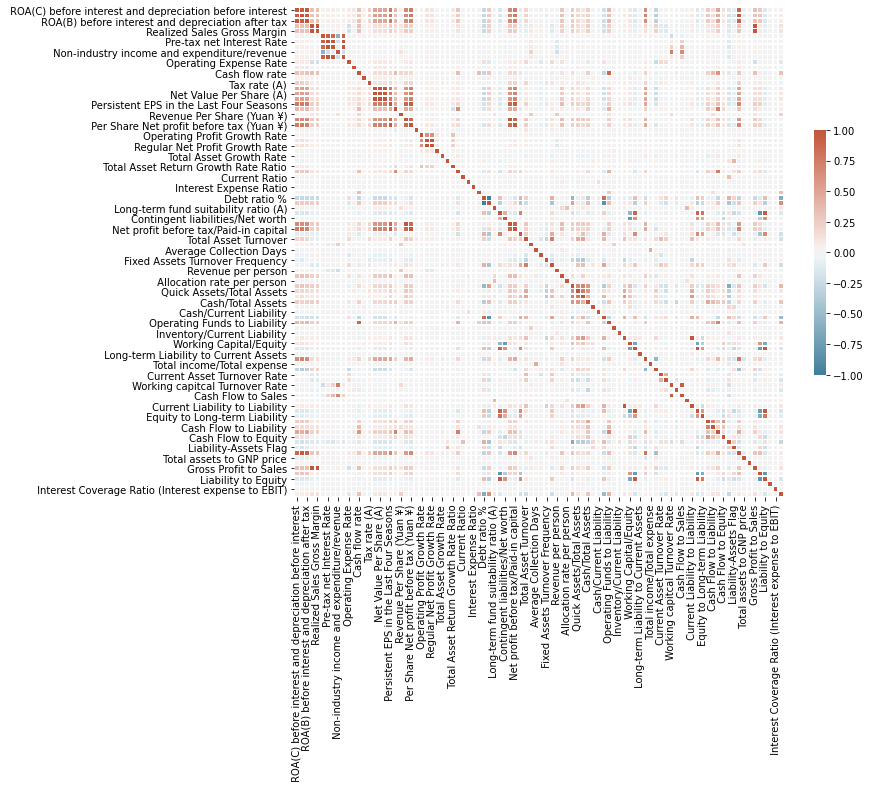

In [481]:
# Correlation Matrix Visualization
import seaborn as sns

mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corrMatrix,  cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [52]:
# Viewing most correlated features to remove redundant information
s = corrMatrix.unstack()
so = s.sort_values(kind="quicksort",ascending=False)
so[:30][so!=1.0]

 Operating Gross Margin                                    Gross Profit to Sales                                      1.000000
 Gross Profit to Sales                                     Operating Gross Margin                                     1.000000
 Net Value Per Share (A)                                   Net Value Per Share (C)                                    0.999837
 Net Value Per Share (C)                                   Net Value Per Share (A)                                    0.999837
 Operating Gross Margin                                    Realized Sales Gross Margin                                0.999518
 Realized Sales Gross Margin                               Operating Gross Margin                                     0.999518
                                                           Gross Profit to Sales                                      0.999518
 Gross Profit to Sales                                     Realized Sales Gross Margin                         

In [45]:
np.fill_diagonal(corrMatrix.values, np.nan)
corrMatrix

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
ROA(C) before interest and depreciation before interest,NaN,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,0.020501,0.051328,...,-0.109272,0.887670,-0.071725,0.008135,0.334721,0.274287,-0.143629,-0.016575,0.010573,0.052416
ROA(A) before interest and % after tax,0.940124,NaN,0.955741,0.326969,0.324956,0.032053,0.053518,0.049474,0.029649,0.049909,...,-0.156890,0.961552,-0.098900,0.011463,0.326971,0.291744,-0.141039,-0.011515,0.013372,0.057887
ROA(B) before interest and depreciation after tax,0.986849,0.955741,NaN,0.333749,0.331755,0.035212,0.053726,0.049952,0.022366,0.052261,...,-0.120680,0.912040,-0.089088,0.007523,0.333750,0.280617,-0.142838,-0.014663,0.011473,0.056430
Operating Gross Margin,0.334719,0.326969,0.333749,NaN,0.999518,0.005745,0.032493,0.027175,0.051438,0.029430,...,-0.032930,0.300143,0.022672,0.004205,1.000000,0.075304,-0.085434,-0.011806,-0.001167,0.120029
Realized Sales Gross Margin,0.332755,0.324956,0.331755,0.999518,NaN,0.005610,0.032232,0.026851,0.051242,0.029166,...,-0.032920,0.298155,0.022750,0.004038,0.999518,0.074891,-0.085407,-0.011268,-0.001158,0.120196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Net Income to Stockholder's Equity,0.274287,0.291744,0.280617,0.075304,0.074891,0.006216,0.011343,0.010648,0.007693,0.011191,...,0.192688,0.328492,-0.040217,0.000127,0.075303,NaN,-0.791836,-0.000093,0.005147,0.029622
Liability to Equity,-0.143629,-0.141039,-0.142838,-0.085434,-0.085407,0.001541,-0.004043,-0.004390,-0.011899,-0.002996,...,-0.229559,-0.159697,0.021982,-0.003724,-0.085434,-0.791836,NaN,0.002119,0.001487,-0.159654
Degree of Financial Leverage (DFL),-0.016575,-0.011515,-0.014663,-0.011806,-0.011268,0.000935,0.000855,0.000927,-0.000556,0.000774,...,-0.001717,-0.010463,-0.001881,-0.008812,-0.011806,-0.000093,0.002119,NaN,0.016513,-0.016739
Interest Coverage Ratio (Interest expense to EBIT),0.010573,0.013372,0.011473,-0.001167,-0.001158,0.000393,0.000984,0.000957,0.001024,0.000798,...,-0.000974,0.012746,0.000239,0.001027,-0.001169,0.005147,0.001487,0.016513,NaN,-0.008339


In [3]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model 
        to generalize and improves the interpretability of the model.

    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                #print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)

    return x

In [64]:
#Decision Tree Feature Exploration
from sklearn.tree import DecisionTreeClassifier
D_tree = DecisionTreeClassifier(criterion='entropy')
D_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [65]:
# Code here
train_acc = D_tree.score(X_train,y_train)
test_acc = D_tree.score(X_test,y_test)

print(f'The accuracty of the model on the training set was {train_acc}, \
while the accuracy of the model on the testing was only {test_acc}')

The accuracty of the model on the training set was 1.0, while the accuracy of the model on the testing was only 0.9560117302052786


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93],
 <a list of 94 Text major ticklabel objects>)

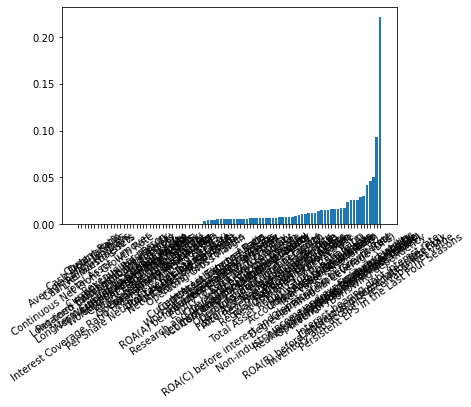

In [66]:
features = X_train.columns
#D_tree.feature_impontances_
pair_df = pd.DataFrame(data=[features,D_tree.feature_importances_])
pair_df = pair_df.transpose()
pair_df.sort_values(1,inplace=True)
plt.bar(pair_df[0],pair_df[1])
plt.xticks(rotation=35)

In [72]:
pair_df.rename(columns={0:'Feature',1:'Importance'},inplace=True)

,Feature,Importance
46,Average Collection Days,0
27,Continuous Net Profit Growth Rate,0
74,Cash Flow to Sales,0
31,Cash Reinvestment %,0
32,Current Ratio,0
...,...,...
13,Interest-bearing debt interest rate,0.0421021
9,Continuous interest rate (after tax),0.0456893
93,Equity to Liability,0.0505197
39,Borrowing dependency,0.092909


In [79]:
pair_df[pair_df['Importance']!=0].sort_values(by='Importance',ascending=False)

,Feature,Importance
18,Persistent EPS in the Last Four Seasons,0.221379
39,Borrowing dependency,0.092909
93,Equity to Liability,0.0505197
9,Continuous interest rate (after tax),0.0456893
13,Interest-bearing debt interest rate,0.0421021
52,Allocation rate per person,0.0301602
43,Inventory and accounts receivable/Net value,0.0294028
62,Inventory/Current Liability,0.0262701
47,Inventory Turnover Rate (times),0.0259756
33,Quick Ratio,0.0253203


In [74]:
len(pair_df[pair_df['Importance']==0])

39

In [80]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_test,y_test)

/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9721407624633431

In [82]:
from sklearn.metrics import plot_confusion_matrix, f1_score, classification_report,
preds = clf.predict(X_test)
f1_score(preds,y_test)

0.0

### The dataset is heavily imbalanced so despite the high accuracy, the model is essentially just predicting negative on every example.  To correct for this we'll try both under and up sampling

In [22]:
df.drop(columns=[' Net Income Flag'],inplace=True)
X = df.iloc[:,1:]
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=47)

In [6]:
full_train = X_train.merge(y_train,left_index=True,right_index=True)

# Undersampling

In [232]:
neg = full_train.loc[full_train['Bankrupt?']==0]
pos = full_train.loc[full_train['Bankrupt?']==1]

In [233]:
neg_samp = neg.sample(n=len(pos),axis=0,random_state=47)

In [234]:
new_samp = neg_samp.append(pos)

In [235]:
pos.shape, new_samp.shape

((184, 96), (368, 96))

In [236]:
# Create undersampled balanced training data
X_t_bal = new_samp.drop('Bankrupt?',axis=1)
y_t_bal = new_samp['Bankrupt?']

In [259]:
# Compare different classifier algorithms
rom sklearn.linear_model import RidgeClassifier, LogisticRegression, SGDClassifier
from sklearn.metrics import plot_confusion_matrix, f1_score, fbeta_score, classification_report
clf = LogisticRegression(random_state=0).fit(X_t_bal, y_t_bal)
preds_1 = clf.predict(X_test)
print(f'Accuracy: {clf.score(X_test,y_test)}')
print(f'F2 Score: {fbeta_score(preds_1,y_test,beta=2)}')
clf2 = LogisticRegression(penalty='l1',solver='liblinear',max_iter=1500,random_state=0).fit(X_t_bal, y_t_bal)
preds_2 = clf2.predict(X_test)
print(clf2.score(X_test,y_test))
print(f'F2 Score: {fbeta_score(preds_2,y_test,beta=2)}')
model = RidgeClassifier(random_state=0).fit(X_t_bal, y_t_bal)
preds_3 = model.predict(X_test)
print(model.score(X_test,y_test))
print(f'F2 Score: {fbeta_score(preds_3,y_test,beta=2)}')

Accuracy: 0.6466275659824047
F2 Score: 0.03623188405797101
0.8394428152492669
F2 Score: 0.1525590551181102
0.8387096774193549
F2 Score: 0.15196078431372545


/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


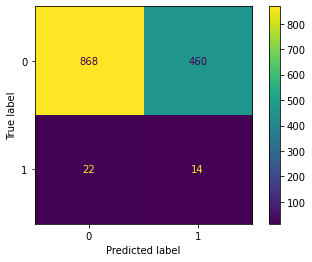

In [201]:
#Out of the box Logistic Regression
plot_confusion_matrix(clf, X_test, y_test)

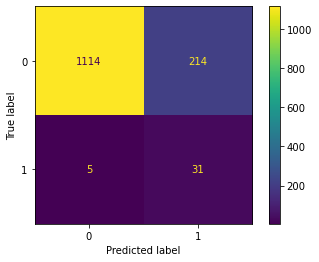

In [202]:
#Logistic Regression with L1 Penalty
plot_confusion_matrix(clf2, X_test, y_test)

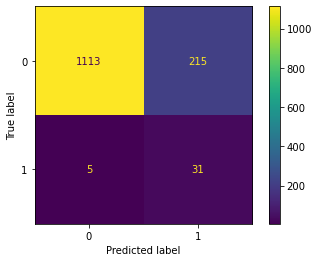

In [200]:
#Ridge Regression
plot_confusion_matrix(model, X_test, y_test)

In [275]:
#Remove Collinear Features
X_t_red = remove_collinear_features(X_t_bal, .8)
msk = list(X_t_red.columns)

In [276]:
X_test_red = X_test[msk]

In [261]:
X_t_red.shape

(368, 62)

In [266]:
# Compare classifiers on reduced datasets
clf_red = LogisticRegression(random_state=0).fit(X_t_red, y_t_bal)
preds_1 = clf_red.predict(X_test_red)
print(clf_red.score(X_test_red,y_test))
print(f'F2 Score: {fbeta_score(preds_1,y_test,beta=2)}')
clf2_red = LogisticRegression(penalty='l1',solver='liblinear', random_state=0).fit(X_t_red, y_t_bal)
preds_2 = clf2_red.predict(X_test_red)
print(clf2_red.score(X_test_red,y_test))
print(f'F2 Score: {fbeta_score(preds_2,y_test,beta=2)}')
model_red = RidgeClassifier(random_state=0).fit(X_t_red, y_t_bal)
preds_3 = model_red.predict(X_test_red)
print(model_red.score(X_test_red,y_test))
print(f'F2 Score: {fbeta_score(preds_3,y_test,beta=2)}')

/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6466275659824047
F2 Score: 0.03623188405797101
0.841642228739003
F2 Score: 0.1543824701195219
0.8269794721407625
F2 Score: 0.1429889298892989


/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.00896e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


### Scaling data

In [295]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_trained = scaler.fit_transform(X_t_bal)
scaled_test = scaler.fit_transform(X_test)

In [293]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaled_trained = scaler.fit_transform(X_t_red)
scaled_test = scaler.fit_transform(X_test_red)

In [291]:
clf2 = LogisticRegression(penalty='l1',solver='liblinear',random_state=0).fit(scaled_trained, y_t_bal)
preds_2 = clf2.predict(scaled_test)
print(clf2.score(scaled_test,y_test))
print(f'F2 Score: {fbeta_score(preds_2,y_test,beta=2)}')

0.5388563049853372
F2 Score: 0.06676557863501484


In [292]:
clf = LogisticRegression(random_state=0).fit(scaled_trained, y_t_bal)
preds = clf.predict(scaled_test)
print(clf.score(scaled_test,y_test))
print(f'F2 Score: {fbeta_score(preds,y_test,beta=2)}')

0.532258064516129
F2 Score: 0.06588579795021962


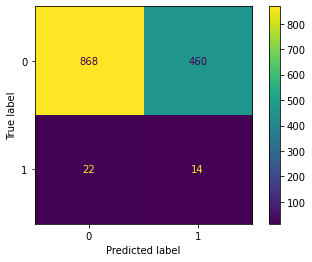

In [207]:
plot_confusion_matrix(clf, X_test, y_test)

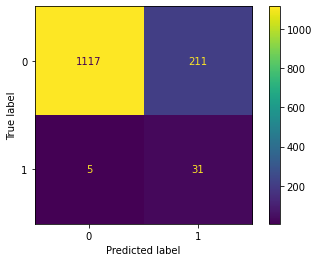

In [208]:
plot_confusion_matrix(clf2, X_test, y_test)

# Upsampling

In [5]:
from imblearn.over_sampling import SMOTE

In [33]:
X_over.drop(columns=' Net Income Flag',inplace=True)

In [532]:
oversample = RandomOverSampler(random_state=0)
X_over,y_over = oversample.fit_resample(X_train,y_train)

In [941]:
y_train[y_train==1].count()

184

Text(0.5, 1.0, 'Before Upsampling')

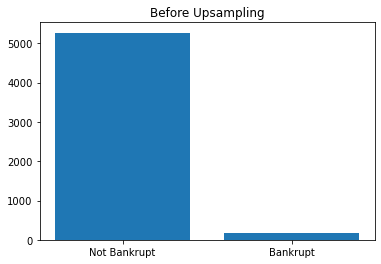

In [538]:
plt.bar(['Not Bankrupt','Bankrupt'],[y_train[y_train==0].count(),y_train[y_train==1].count()])
plt.title('Before Upsampling')

Text(0.5, 1.0, 'After Upsampling')

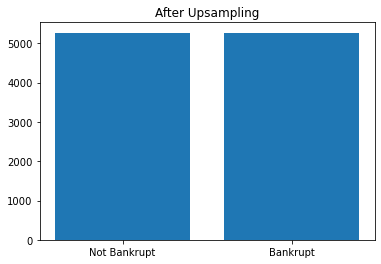

In [537]:
plt.bar(['Not Bankrupt','Bankrupt'],[y_over[y_over==0].count(),y_over[y_over==1].count()])
plt.title('After Upsampling')

In [8]:
from sklearn.linear_model import RidgeClassifier, LogisticRegression, SGDClassifier
from sklearn.metrics import plot_confusion_matrix, f1_score, fbeta_score, classification_report

In [10]:
#Without Scaling
clf = LogisticRegression(random_state=0).fit(X_over, y_over)
preds_1 = clf.predict(X_test)
print(f'Accuracy: {clf.score(X_test,y_test)}')
print(f'F2 Score: {fbeta_score(preds_1,y_test,beta=2)}')

model = RidgeClassifier(random_state=0).fit(X_over, y_over)
preds_3 = model.predict(X_test)
print(model.score(X_test,y_test))
print(f'F2 Score: {fbeta_score(preds_3,y_test,beta=2)}')

Accuracy: 0.7265395894428153
F2 Score: 0.049867021276595744
0.8570381231671554
F2 Score: 0.16039823008849555


/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.32013e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [34]:
# Scale data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler1 = StandardScaler()
scaled1_trained = scaler1.fit_transform(X_over)
scaled1_test = scaler1.fit_transform(X_test)
scaler2 = MinMaxScaler()
scaled2_trained = scaler2.fit_transform(X_over)
scaled2_test = scaler2.fit_transform(X_test)

In [35]:
# Standard Scaling
clf = LogisticRegression(random_state=0).fit(scaled1_trained, y_over)
preds_1 = clf.predict(scaled1_test)
print(f'Accuracy: {clf.score(scaled1_test,y_test)}')
print(f'F2 Score: {fbeta_score(preds_1,y_test,beta=2)}')
clf2 = LogisticRegression(penalty='l1',solver='liblinear',random_state=0).fit(scaled1_trained, y_over)
preds_2 = clf2.predict(X_test)
print(clf2.score(X_test,y_test))
print(f'F2 Score: {fbeta_score(preds_2,y_test,beta=2)}')
model = RidgeClassifier(random_state=0).fit(scaled1_trained, y_over)
preds_3 = model.predict(scaled1_test)
print(model.score(scaled1_test,y_test))
print(f'F2 Score: {fbeta_score(preds_3,y_test,beta=2)}')

/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.5373900293255132
F2 Score: 0.06491097922848663
0.5293255131964809
F2 Score: 0.03637059724349158
0.5344574780058651
F2 Score: 0.06452802359882005


In [37]:
# MinMax Scaling
clf = LogisticRegression(random_state=0).fit(scaled2_trained, y_over)
preds_1 = clf.predict(scaled2_test)
print(f'Accuracy: {clf.score(scaled2_test,y_test)}')
print(f'F2 Score: {fbeta_score(preds_1,y_test,beta=2)}')
clf2 = LogisticRegression(penalty='l1',solver='liblinear',random_state=0).fit(scaled2_trained, y_over)
preds_2 = clf2.predict(X_test)
print(clf2.score(X_test,y_test))
print(f'F2 Score: {fbeta_score(preds_2,y_test,beta=2)}')
model = RidgeClassifier(random_state=0).fit(scaled1_trained, y_over)
preds_3 = model.predict(scaled1_test)
print(model.score(scaled1_test,y_test))
print(f'F2 Score: {fbeta_score(preds_3,y_test,beta=2)}')

/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.5153958944281525
F2 Score: 0.062144886363636354
0.5102639296187683
F2 Score: 0.036710719530102784
0.5344574780058651
F2 Score: 0.06452802359882005


# Random Forest

In [24]:
msk = summary[summary['max']>1].index

In [ ]:
df.drop(columns=[' Net Income Flag'],inplace=True)
X = df.iloc[:,1:]
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=47)

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [166]:
clf = RandomForestClassifier( max_depth = 5, min_samples_split=85, random_state=0)
clf.fit(X_over, y_over)
preds = clf.predict(X_test)
print(f'F2 Score: {fbeta_score(preds,y_test,beta=2)}')

F2 Score: 0.2072192513368984


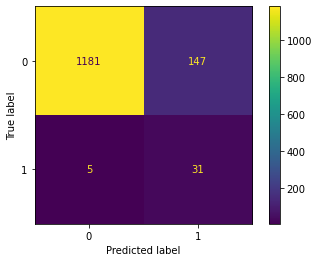

In [167]:
plot_confusion_matrix(clf, X_test, y_test)

<BarContainer object of 94 artists>

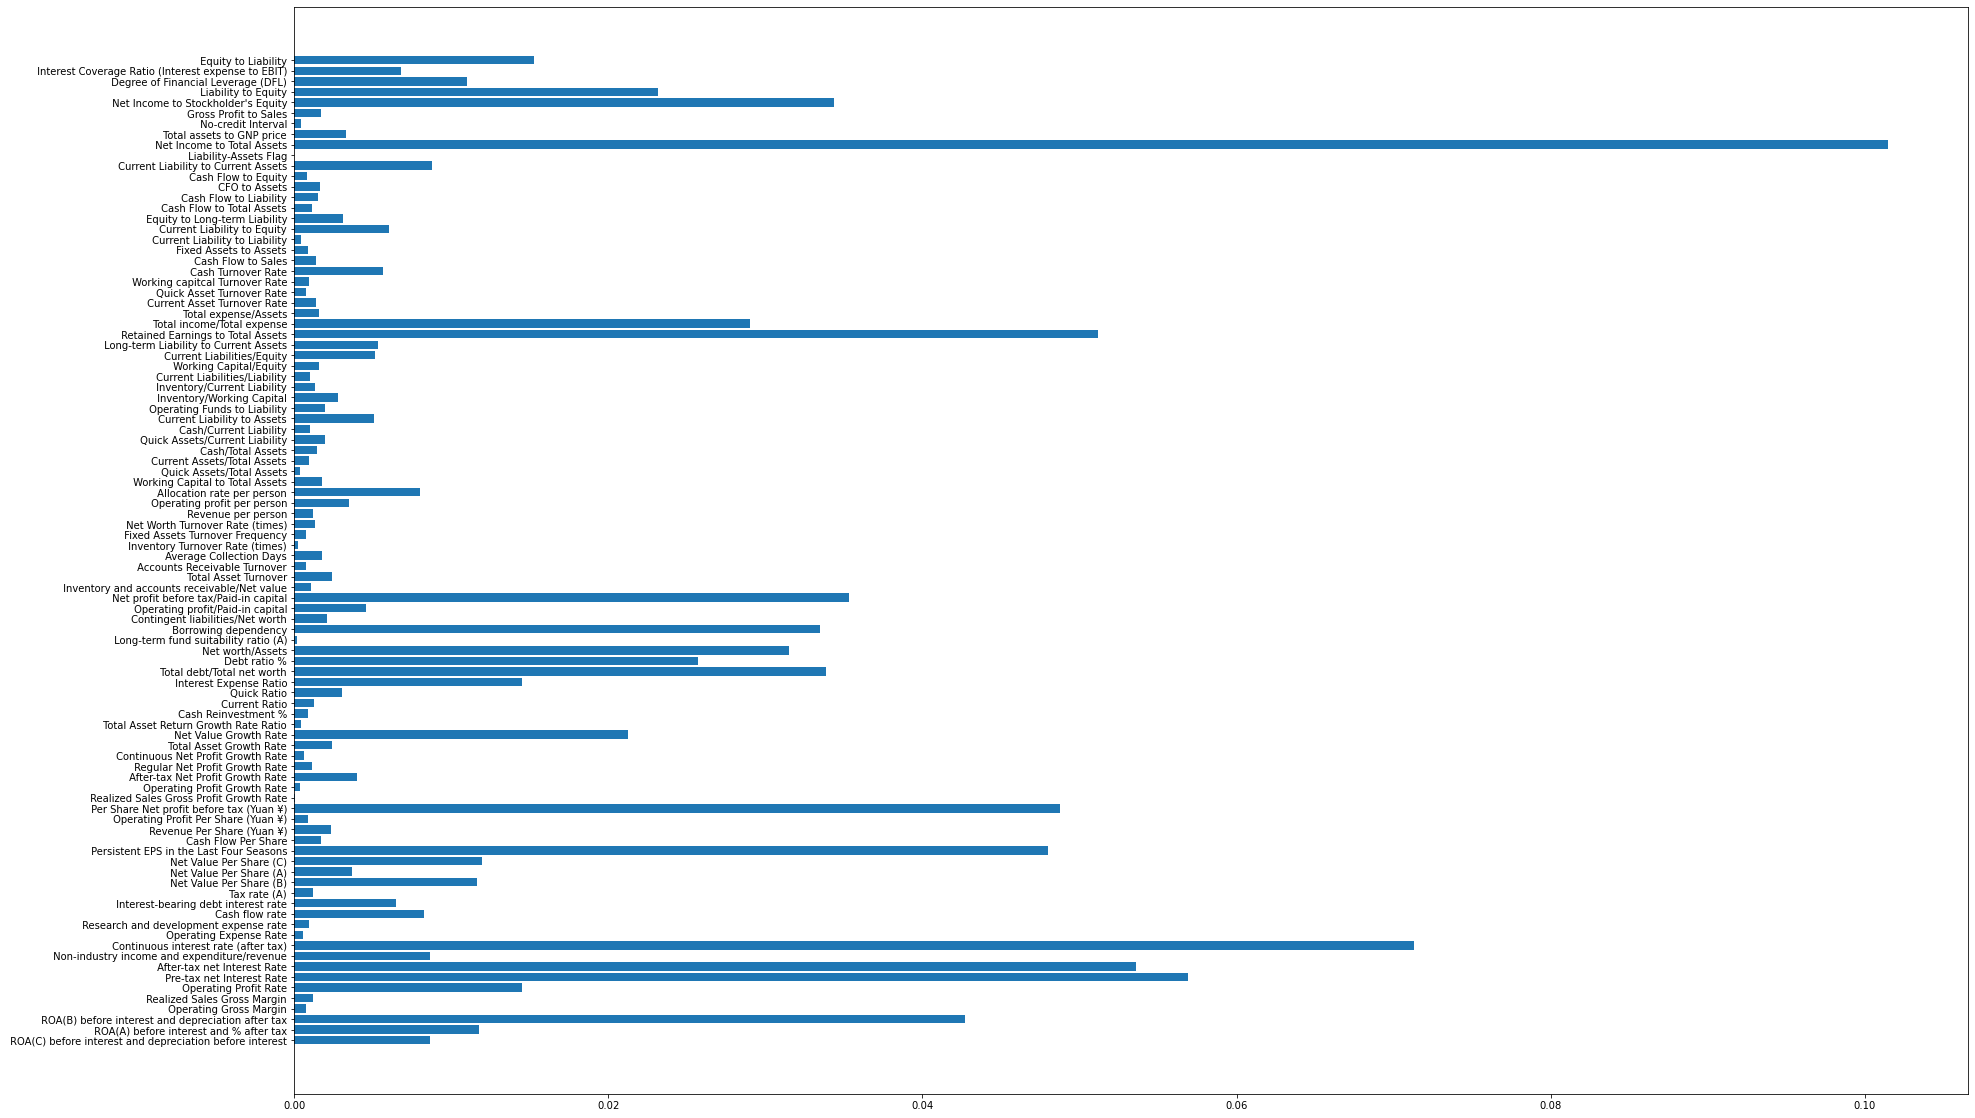

In [146]:
# Random forest feature importance
plt.figure(figsize=(30,20))
plt.barh(X_over.columns, clf.feature_importances_)

# Gradient Boosting

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

In [121]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1,
    max_depth=1, random_state=0).fit(X_over, y_over) = 

F2 Score: 0.25862068965517243


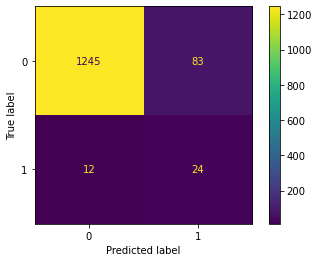

In [122]:
preds = clf.predict(X_test)
print(f'F2 Score: {fbeta_score(preds,y_test,beta=2)}')
plot_confusion_matrix(clf, X_test, y_test)

# Reduced Features, Oversampling RF vs. GB

In [127]:
X_over_red = remove_collinear_features(X_over, .8)
msk = X_over_red.columns
X_test_red=X_test[msk]

### Random Forest

In [128]:
clf = RandomForestClassifier(max_depth = 5, min_samples_split=85, random_state=0)
clf.fit(X_over_red, y_over)
preds = clf.predict(X_test_red)
print(f'F2 Score: {fbeta_score(preds,y_test,beta=2)}')

F2 Score: 0.19594594594594594


F2 Score: 0.19594594594594594


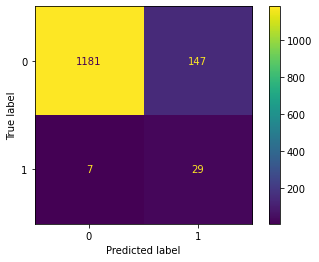

In [130]:
preds = clf.predict(X_test_red)
print(f'F2 Score: {fbeta_score(preds,y_test,beta=2)}')
plot_confusion_matrix(clf, X_test_red, y_test)

### Gradient Boost

In [131]:
#Gradient Boost
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1,
    max_depth=1, random_state=0).fit(X_over, y_over)
clf.fit(X_over_red, y_over)
preds = clf.predict(X_test_red)
print(f'F2 Score: {fbeta_score(preds,y_test,beta=2)}')

F2 Score: 0.21590909090909088


F2 Score: 0.21590909090909088


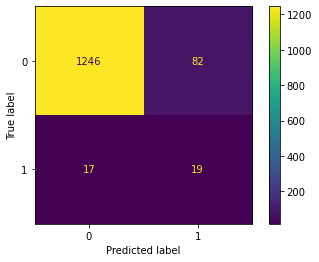

In [132]:
preds = clf.predict(X_test_red)
print(f'F2 Score: {fbeta_score(preds,y_test,beta=2)}')
plot_confusion_matrix(clf, X_test_red, y_test)

# K Nearest Neighbors 

In [133]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_over,y_over)

KNeighborsClassifier()

F2 Score: 0.06516587677725119


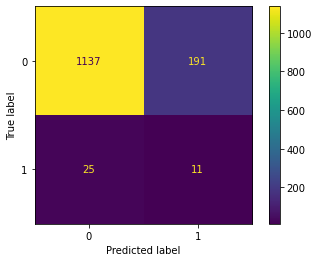

In [136]:
preds = model.predict(X_test)
print(f'F2 Score: {fbeta_score(preds,y_test,beta=2)}')
plot_confusion_matrix(model, X_test, y_test)

# Naieve Bayes

F2 Score: 0.050475059382422804


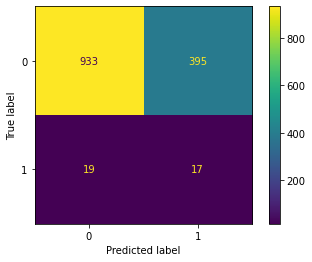

In [151]:
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB()
cnb.fit(X_over,y_over)
preds = cnb.predict(X_test)
print(f'F2 Score: {fbeta_score(preds,y_test,beta=2)}')
plot_confusion_matrix(cnb, X_test, y_test)

# Feature Reduction Part 2

## Ridge Regression with PCA

F2 Score: 0.03566576086956522


/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.39593e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


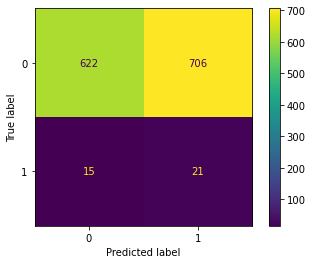

In [156]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 60)
X_over_pca = pca.fit_transform(X_over)
X_test_pca = pca.fit_transform(X_test)
clf = RidgeClassifier(random_state=0).fit(X_over_pca, y_over)
preds = clf.predict(X_test_pca)
print(f'F2 Score: {fbeta_score(preds,y_test,beta=2)}')
plot_confusion_matrix(clf, X_test_pca, y_test)

### Examining the Singular Values

Text(0, 0.5, 'Magnitude')

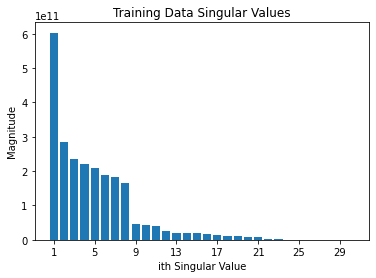

In [643]:
x = list(range(1,31))
vs = val[:30]
plt.xticks(np.arange(1,31,4)) 
plt.bar(x,vs)
plt.title('Training Data Singular Values')
plt.xlabel('ith Singular Value')
plt.ylabel('Magnitude')

Text(0, 0.5, 'Magnitude')

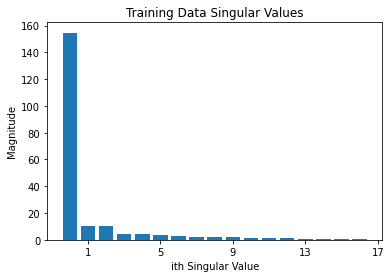

In [922]:
# Viewing data matrix singular values
x = list(range(len(val)))
vs = val
plt.xticks(np.arange(1,len(x)+1,4)) 
plt.bar(x,vs)
plt.title('Training Data Singular Values')
plt.xlabel('ith Singular Value')
plt.ylabel('Magnitude')

In [607]:
# Function to score models on PCA reduced data
def score_model_pca(model, cv = None):
    if cv is None:
        cv = KFold(n_splits=5)
        
    smoter = SMOTE(random_state=0)
    rando = RandomOverSampler(random_state=0)
    scaler = StandardScaler()
    pca = PCA(n_components = 8)
    scores = []
    for train_fold_index, val_fold_index in cv.split(X_train, y_train):
        X_train_fold, y_train_fold = X_train_corr.iloc[train_fold_index], y_train.iloc[train_fold_index]
        X_val_fold, y_val_fold = X_train_corr.iloc[val_fold_index], y_train.iloc[val_fold_index]
        #X_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(X_train_fold,
        #                                                                y_train_fold)
        X_train_fold_upsample, y_train_fold_upsample = rando.fit_resample(X_train_fold,
                                                                           y_train_fold)
        X_train_fold_upsample_scaled = scaler.fit_transform(X_train_fold_upsample)
        X_val_fold_scaled = scaler.transform(X_val_fold)
        X_train_fold_upsample_pca = pca.fit_transform(X_train_fold_upsample_scaled)
        X_val_fold_pca = pca.transform(X_val_fold_scaled)
        model_obj = model.fit(X_train_fold_upsample_pca, y_train_fold_upsample)
        #model_obj = model.fit(X_train_fold, y_train_fold)
        score = recall_score(y_val_fold, model_obj.predict(X_val_fold_pca))
        scores.append(score)
    return np.array(scores)

#### Bernoulli Naieve Bayes

In [608]:
score_model_pca(BernoulliNB(alpha = 5)).mean()

0.8507313934143201

In [610]:
score_model_corr(BernoulliNB(alpha = 10)).mean()

0.8797902163755824

F2 Score: 0.12204142011834318


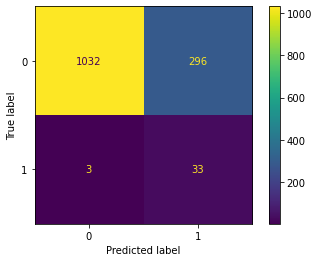

In [187]:
scaler = StandardScaler()
from sklearn.naive_bayes import BernoulliNB
X_over_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = BernoulliNB(alpha = 10)
model.fit(X_over_scaled,y_train)
preds = model.predict(X_test_scaled)
print(f'F2 Score: {fbeta_score(preds,y_test,beta=2)}')
plot_confusion_matrix(model, X_test_scaled, y_test)

In [611]:
score_model_pca(BernoulliNB(alpha = 15)).mean()

0.8507313934143201

#### Logistic Regression

In [613]:
score_model_pca(LogisticRegression(random_state=0)).mean()

0.8550820855698905

In [615]:
score_model_corr(LogisticRegression(random_state=0)).mean()

0.8714285714285716

# Cross Validation

In [234]:
def score_model_p(model, params, cv = None):
    if cv is None:
        cv = KFold(n_splits=5)
        
    smoter = SMOTE(random_state=0)
    scores = []
    for train_fold_index, val_fold_index in cv.split(X_train, y_train):
        X_train_fold, y_train_fold = X_train.iloc[train_fold_index], y_train.iloc[train_fold_index]
        X_val_fold, y_val_fold = X_train.iloc[val_fold_index], y_train.iloc[val_fold_index]
        X_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(X_train_fold,
                                                                           y_train_fold)
        model_obj = model(**params).fit(X_train_fold_upsample, y_train_fold_upsample)
        score = recall_score(y_val_fold, model_obj.predict(X_val_fold))
        scores.append(score)
    return np.array(scores)

In [233]:
def score_model_over(model, cv = None):
    if cv is None:
        cv = KFold(n_splits=5)
        
    smoter = SMOTE(random_state=0)
    scores = []
    for train_fold_index, val_fold_index in cv.split(X_train, y_train):
        X_train_fold, y_train_fold = X_train.iloc[train_fold_index], y_train.iloc[train_fold_index]
        X_val_fold, y_val_fold = X_train.iloc[val_fold_index], y_train.iloc[val_fold_index]
        X_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(X_train_fold,
                                                                           y_train_fold)
        model_obj = model.fit(X_train_fold_upsample, y_train_fold_upsample)
        score = recall_score(y_val_fold, model_obj.predict(X_val_fold))
        scores.append(score)
    return np.array(scores)

In [192]:
def score_model_scale(model, cv = None):
    if cv is None:
        cv = KFold(n_splits=5)
        
    smoter = SMOTE(random_state=0)
    scores = []
    for train_fold_index, val_fold_index in cv.split(X_train, y_train):
        X_train_fold, y_train_fold = X_train.iloc[train_fold_index], y_train.iloc[train_fold_index]
        X_val_fold, y_val_fold = X_train.iloc[val_fold_index], y_train.iloc[val_fold_index]
        X_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(X_train_fold,
                                                                           y_train_fold)
        #Rescale
        X_tr = scaler.fit_transform(X_train_fold_upsample)
        X_t = scaler.transform(X_val_fold)
        model_obj = model.fit(X_tr, y_train_fold_upsample)
        score = recall_score(y_val_fold, model_obj.predict(X_t))
        scores.append(score)
    return np.array(scores)

In [180]:
#Get the score per fold
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score
model = RandomForestClassifier(max_depth = 5, min_samples_split=85, random_state=0)
score_model(model)

array([0.82051282, 0.78378378, 0.71794872, 0.89285714, 0.7804878 ])

In [182]:
#Average the Scores
np.array([0.82051282, 0.78378378, 0.71794872, 0.89285714, 0.7804878 ]).mean()

0.799118052

In [185]:
#Average Scores for Gradient Boost
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1,
    max_depth=2, random_state=0)
scores = score_model(model)
print(np.mean(scores))

0.3915610866830379


In [195]:
# Scores for Naive Bayes
model = BernoulliNB(alpha = 10)
score_model_scale(model)

array([0.74358974, 0.75675676, 0.79487179, 0.85714286, 0.80487805])

In [197]:
np.array([0.74358974, 0.75675676, 0.79487179, 0.85714286, 0.80487805]).mean()

0.79144784

In [210]:
# Random Forest Hypertuning
params = {'n_estimators': [50, 100, 200],
 'max_depth': [4, 5, 10, 12],
 'random_state': [0]}
score_tracker = []
for n_estimators in params['n_estimators']:
    for max_depth in params['max_depth']:
        example_params = {
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'random_state': 0
        }
        example_params['recall'] = score_model(RandomForestClassifier, 
                                               example_params, cv=None).mean()
        score_tracker.append(example_params)
score_tracker

[{'n_estimators': 50,
  'max_depth': 4,
  'random_state': 0,
  'recall': 0.7988678976483854},
 {'n_estimators': 50,
  'max_depth': 5,
  'random_state': 0,
  'recall': 0.7734770283550771},
 {'n_estimators': 50,
  'max_depth': 10,
  'random_state': 0,
  'recall': 0.6328427999159706},
 {'n_estimators': 50,
  'max_depth': 12,
  'random_state': 0,
  'recall': 0.6137361430044358},
 {'n_estimators': 100,
  'max_depth': 4,
  'random_state': 0,
  'recall': 0.8037459464288732},
 {'n_estimators': 100,
  'max_depth': 5,
  'random_state': 0,
  'recall': 0.7765905814686302},
 {'n_estimators': 100,
  'max_depth': 10,
  'random_state': 0,
  'recall': 0.6661810832542538},
 {'n_estimators': 100,
  'max_depth': 12,
  'random_state': 0,
  'recall': 0.6037569330252258},
 {'n_estimators': 200,
  'max_depth': 4,
  'random_state': 0,
  'recall': 0.8037459464288732},
 {'n_estimators': 200,
  'max_depth': 5,
  'random_state': 0,
  'recall': 0.7786052334832823},
 {'n_estimators': 200,
  'max_depth': 10,
  'rando

In [209]:
params = {'learning_rate':[.01,1.5,1],
    'n_estimators': [50, 100, 200],
 'max_depth': [4, 6, 10, 12],
 'random_state': [0]}
score_tracker = []
for n_estimators in params['n_estimators']:
    for max_depth in params['max_depth']:
        example_params = {
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'random_state': 0
        }
        example_params['recall'] = score_model(GradientBoostingClassifier, 
                                               example_params, cv=None).mean()
        score_tracker.append(example_params)
score_tracker

[{'n_estimators': 50,
  'max_depth': 4,
  'random_state': 0,
  'recall': 0.6746017660651809},
 {'n_estimators': 50,
  'max_depth': 6,
  'random_state': 0,
  'recall': 0.5814525729159875},
 {'n_estimators': 50,
  'max_depth': 10,
  'random_state': 0,
  'recall': 0.5271418429955015},
 {'n_estimators': 50,
  'max_depth': 12,
  'random_state': 0,
  'recall': 0.5214862812423788},
 {'n_estimators': 100,
  'max_depth': 4,
  'random_state': 0,
  'recall': 0.5819528856114222},
 {'n_estimators': 100,
  'max_depth': 6,
  'random_state': 0,
  'recall': 0.5152050871563068},
 {'n_estimators': 100,
  'max_depth': 10,
  'random_state': 0,
  'recall': 0.47552850357728405},
 {'n_estimators': 100,
  'max_depth': 12,
  'random_state': 0,
  'recall': 0.45810219224853377},
 {'n_estimators': 200,
  'max_depth': 4,
  'random_state': 0,
  'recall': 0.5137177917665723},
 {'n_estimators': 200,
  'max_depth': 6,
  'random_state': 0,
  'recall': 0.4744025585489},
 {'n_estimators': 200,
  'max_depth': 10,
  'random

# Feature Reduction

In [228]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.6*(.4)))
selector = sel.fit_transform(X_train,)
X_train_fr = X_train.loc[:, sel.get_support()]
X_train_fr.head()

,Operating Expense Rate,Research and development expense rate,Interest-bearing debt interest rate,Revenue Per Share (Yuan ¥),Total Asset Growth Rate,Net Value Growth Rate,Current Ratio,Quick Ratio,Total debt/Total net worth,Accounts Receivable Turnover,...,Revenue per person,Allocation rate per person,Quick Assets/Current Liability,Cash/Current Liability,Inventory/Current Liability,Long-term Liability to Current Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Total assets to GNP price
1895,4.560000e+09,4.750000e+08,1.427143e-03,0.235779,7.080000e+09,0.000442,0.006184,0.005799,0.021508,0.001404,...,0.127253,0.006691,0.005823,0.002631,0.001289,0.000000,4.100000e+09,4.450000e+09,2.130000e+08,0.003778
4297,7.550000e+08,4.990000e+09,3.960396e-04,0.140524,5.370000e+09,0.000457,0.013725,0.009886,0.006931,0.002013,...,0.112880,0.000519,0.010195,0.020628,0.009464,0.004348,5.850000e+09,4.720000e+09,1.011471e-04,0.009740
5424,3.650644e-04,1.084929e-04,2.590259e-04,0.005188,5.260000e+09,0.000405,0.005768,0.005637,0.001876,0.000629,...,0.012878,0.026401,0.005739,0.005070,0.000434,0.000000,1.442787e-04,1.525567e-04,1.244125e-04,0.000610
4821,1.150583e-04,5.280000e+09,7.200000e+08,0.052831,7.930000e+09,0.000484,0.017375,0.011265,0.002634,0.000964,...,0.017605,0.003749,0.012831,0.013502,0.012082,0.000000,1.440352e-04,1.127966e-04,1.136284e-04,0.000925
4975,7.170000e+09,3.010000e+09,3.670367e-04,0.032458,6.340000e+09,0.000476,0.014588,0.014594,0.001732,0.000550,...,0.062483,0.003566,0.014554,0.016465,0.000443,0.000000,1.403741e-04,1.512188e-04,1.607096e-04,0.001861


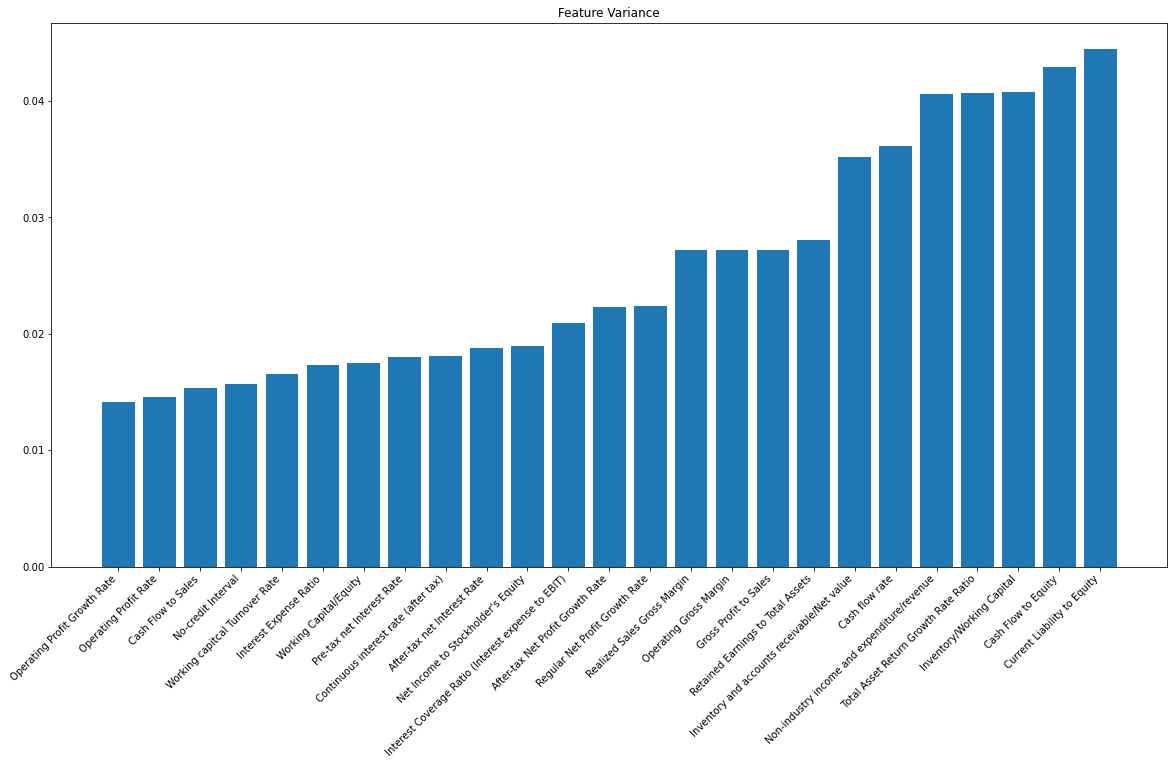

In [473]:
me = (X_train.std(axis=0)/X_train.mean(axis=0)).sort_values()[:25]
plt.figure(figsize=(20,10))
plt.bar(me.index,me)
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.title('Feature Variance')
plt.show()

In [460]:
df[' Current Ratio']

0       0.002259
1       0.006016
2       0.011543
3       0.004194
4       0.006022
          ...   
6814    0.010451
6815    0.009259
6816    0.038424
6817    0.012782
6818    0.051348
Name:  Current Ratio, Length: 6819, dtype: float64

In [449]:
df[' Quick Asset Turnover Rate']

0       6.550000e+09
1       7.700000e+09
2       1.022676e-03
3       6.050000e+09
4       5.050000e+09
            ...     
6814    1.244230e-04
6815    1.173396e-04
6816    1.749713e-04
6817    1.351937e-04
6818    8.238471e-03
Name:  Quick Asset Turnover Rate, Length: 6819, dtype: float64

In [417]:
X_train.var(axis=0).sort_values(ascending=False)[:40]

 Quick Asset Turnover Rate                                  1.126214e+19
 Inventory Turnover Rate (times)                            1.063391e+19
 Operating Expense Rate                                     1.047367e+19
 Cash Turnover Rate                                         8.711382e+18
 Total Asset Growth Rate                                    8.394885e+18
 Current Asset Turnover Rate                                8.021575e+18
 Research and development expense rate                      6.699437e+18
 Fixed Assets Turnover Frequency                            6.100756e+18
 Inventory/Current Liability                                3.727818e+17
 Long-term Liability to Current Assets                      3.563712e+17
 Cash/Current Liability                                     3.027731e+17
 Total assets to GNP price                                  1.270972e+17
 Average Collection Days                                    8.130044e+16
 Allocation rate per person                        

In [244]:
me.index

Index([' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' ROA(C) before interest and depreciation before interest',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' After-tax net Interest Rate', ' Operating Profit Rate',
       ' Pre-tax net Interest Rate', ' Continuous interest rate (after tax)',
       ' Non-industry income and expenditure/revenue'],
      dtype='object')

In [ ]:
X_test_fr = sel.transform(X_test)

In [223]:
def score_model_fr(model, cv = None):
    if cv is None:
        cv = KFold(n_splits=5)
        
    smoter = SMOTE(random_state=0)
    scores = []
    for train_fold_index, val_fold_index in cv.split(X_train_fr, y_train):
        X_train_fold, y_train_fold = X_train_fr.iloc[train_fold_index], y_train.iloc[train_fold_index]
        X_val_fold, y_val_fold = X_train_fr.iloc[val_fold_index], y_train.iloc[val_fold_index]
        X_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(X_train_fold,
                                                                           y_train_fold)
        model_obj = model.fit(X_train_fold_upsample, y_train_fold_upsample)
        score = recall_score(y_val_fold, model_obj.predict(X_val_fold))
        scores.append(score)
    return np.array(scores)

In [224]:
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(),
                     BernoulliNB(alpha = 10))
score_model_fr(clf)

array([0.76923077, 0.56756757, 0.64102564, 0.5       , 0.51219512])

In [235]:
clf = make_pipeline(StandardScaler(),
                     BernoulliNB(alpha = 10))
score_model(clf)

array([0.74358974, 0.75675676, 0.79487179, 0.85714286, 0.80487805])

In [266]:
score_model_fr(LogisticRegression(random_state=0, n))

/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

array([0.48717949, 0.45945946, 0.53846154, 0.5       , 0.29268293])

In [268]:
score_model(LogisticRegression(random_state=0))

/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

array([0.48717949, 0.45945946, 0.53846154, 0.5       , 0.29268293])

In [269]:
clf = make_pipeline(StandardScaler(),
                     LogisticRegression(random_state=0))
score_model(clf)

/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

array([0.74358974, 0.67567568, 0.76923077, 0.71428571, 0.70731707])

In [270]:
clf = make_pipeline(StandardScaler(),
                     LogisticRegression(random_state=0))
score_model_fr(clf)

array([0.71794872, 0.64864865, 0.64102564, 0.46428571, 0.53658537])

In [272]:
np.array([0.74358974, 0.67567568, 0.76923077, 0.71428571, 0.70731707]).mean()

0.722019794

In [274]:
np.array([0.71794872, 0.64864865, 0.64102564, 0.46428571, 0.53658537]).mean()

0.601698818

# Correlation Test 

In [287]:
corr_test = X_train.merge(y_train,left_index=True,right_index=True)
corr_test.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt?
1895,0.474870,0.535216,0.526741,0.595778,0.595778,0.998958,0.797379,0.809307,0.303529,0.781565,...,0.796667,0.003778,0.623706,0.595777,0.840152,0.290377,0.022916,0.572086,0.016399,0
4297,0.488178,0.552769,0.540821,0.598185,0.598185,0.998967,0.797401,0.809325,0.303550,0.781582,...,0.808462,0.009740,0.623931,0.598181,0.841060,0.279805,0.026939,0.565775,0.029124,0
5424,0.412811,0.459006,0.457198,0.613096,0.613118,0.998917,0.796764,0.808701,0.302540,0.780974,...,0.750150,0.000610,0.623721,0.613092,0.837475,0.276140,0.026784,0.565126,0.076616,0
4821,0.558914,0.616823,0.598640,0.611374,0.611280,0.999137,0.797611,0.809479,0.303559,0.781740,...,0.842450,0.000925,0.624092,0.611373,0.842822,0.276689,0.026793,0.565165,0.058446,0
4975,0.489884,0.553696,0.536753,0.604268,0.604268,0.999068,0.797507,0.809396,0.303523,0.781661,...,0.809502,0.001861,0.624525,0.604266,0.840790,0.276035,0.026791,0.565159,0.081752,0


In [979]:
corr_test2 = X_train_corr2.merge(y_train, left_index=True, right_index=True)
cor2  = corr_test2.corr()
cor_target2 = abs(cor2['Bankrupt?'])
cor_target2 = cor_target2.drop('Bankrupt?')
cor_target2.sort_values(ascending=False)


 Net Income to Total Assets                     0.330575
 Debt ratio %                                   0.251671
 Working Capital to Total Assets                0.200695
 Net Income to Stockholder's Equity             0.195255
 Net Value Per Share (A)                        0.169483
 Working Capital/Equity                         0.151153
 Operating Profit Per Share (Yuan ¥)            0.149077
 Total expense/Assets                           0.147447
 Liability-Assets Flag                          0.135124
 CFO to Assets                                  0.124464
 Tax rate (A)                                   0.111221
 Gross Profit to Sales                          0.107983
 Cash/Total Assets                              0.101841
 Operating profit per person                    0.097006
 Cash Flow to Total Assets                      0.079033
 Fixed Assets to Assets                         0.076412
 Fixed Assets Turnover Frequency                0.075958
 Total Asset Turnover          

In [1004]:
cor = corr_test.corr()
cor_target = abs(cor['Bankrupt?'])
cor_target.sort_values(ascending=False)[:50]

Bankrupt?                                                   1.000000
 Net Income to Total Assets                                 0.330575
 ROA(A) before interest and % after tax                     0.297193
 ROA(B) before interest and depreciation after tax          0.284716
 ROA(C) before interest and depreciation before interest    0.271489
 Debt ratio %                                               0.251671
 Net worth/Assets                                           0.251671
 Persistent EPS in the Last Four Seasons                    0.226261
 Retained Earnings to Total Assets                          0.223314
 Net profit before tax/Paid-in capital                      0.213938
 Per Share Net profit before tax (Yuan ¥)                   0.206021
 Working Capital to Total Assets                            0.200695
 Net Income to Stockholder's Equity                         0.195255
 Current Liability to Assets                                0.191326
 Borrowing dependency             

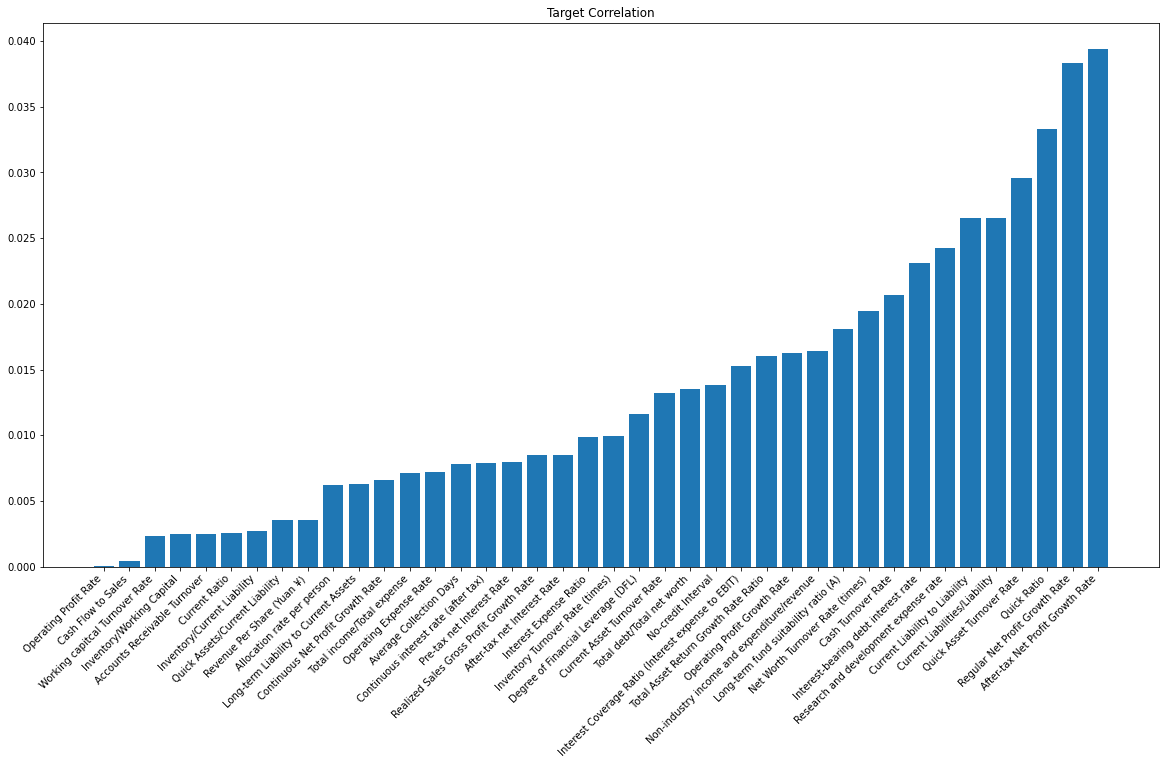

In [515]:
subslice = cor_target.sort_values()[:40]
#subslice = subslice.drop('Bankrupt?')
plt.figure(figsize=(20,10))
plt.bar(subslice.index,subslice)
plt.title('Target Correlation')
plt.xticks(rotation=45, ha='right')
plt.show()

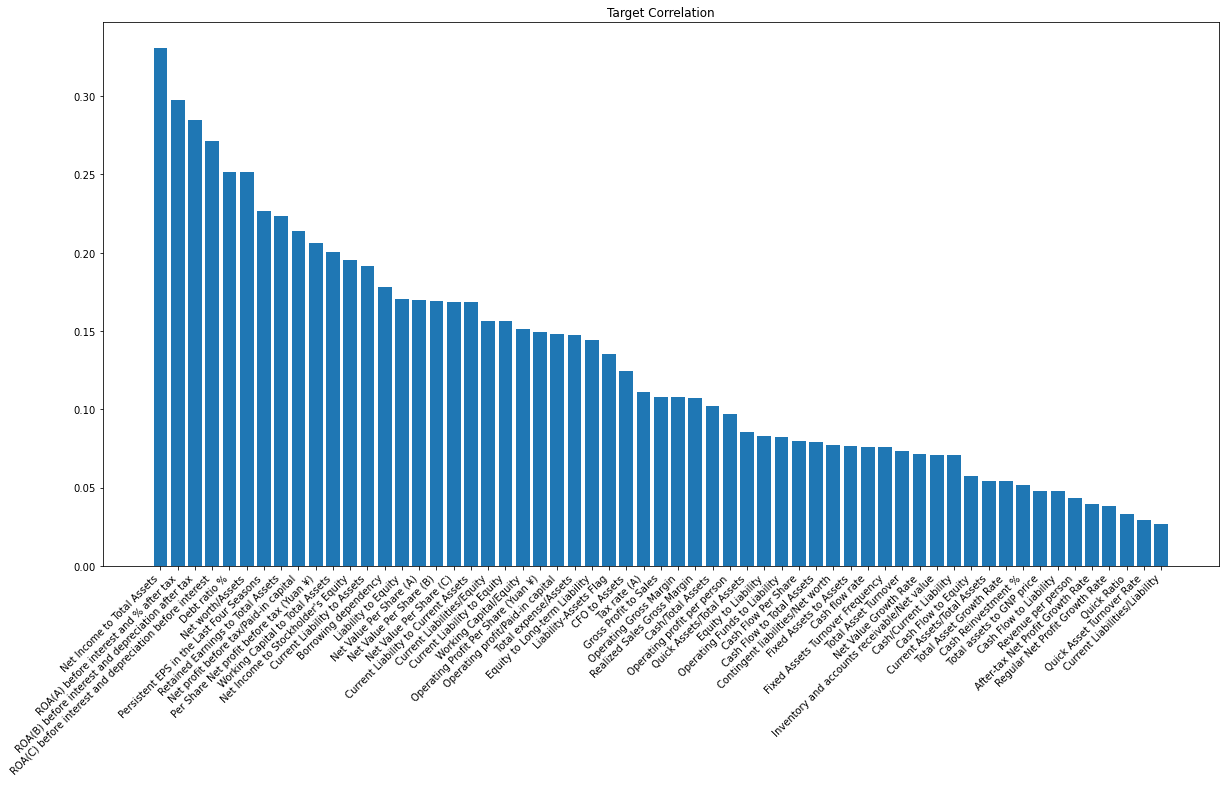

In [574]:
subslice = cor_target.sort_values(ascending=False)[:60]
subslice = subslice.drop('Bankrupt?')
plt.figure(figsize=(20,10))
plt.bar(subslice.index,subslice)
plt.title('Target Correlation')
plt.xticks(rotation=45, ha='right')
plt.show()

In [996]:
cols = cor_target.sort_values(ascending=False)[:50].index

In [997]:
cols = cols.drop('Bankrupt?')
cols

Index([' Net Income to Total Assets',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' ROA(C) before interest and depreciation before interest',
       ' Debt ratio %', ' Net worth/Assets',
       ' Persistent EPS in the Last Four Seasons',
       ' Retained Earnings to Total Assets',
       ' Net profit before tax/Paid-in capital',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Working Capital to Total Assets',
       ' Net Income to Stockholder's Equity', ' Current Liability to Assets',
       ' Borrowing dependency', ' Liability to Equity',
       ' Net Value Per Share (A)', ' Net Value Per Share (B)',
       ' Net Value Per Share (C)', ' Current Liability to Current Assets',
       ' Current Liabilities/Equity', ' Current Liability to Equity',
       ' Working Capital/Equity', ' Operating Profit Per Share (Yuan ¥)',
       ' Operating profit/Paid-in capital', ' Total expense/Assets',
       ' Equit

In [305]:
msk = cor[cols[0]]<.8
cor[msk]

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt?
Operating Gross Margin,0.344622,0.333495,0.343645,1.000000,0.999485,0.011598,0.017693,0.012586,0.007394,0.015930,...,0.302275,0.022195,0.002020,1.000000,0.069597,-0.081043,-0.011537,0.002875,0.080500,-0.107982
Realized Sales Gross Margin,0.342312,0.331157,0.341320,0.999485,1.000000,0.011439,0.017364,0.012186,0.007116,0.015598,...,0.299972,0.022287,0.001794,0.999485,0.069165,-0.080993,-0.010918,0.002889,0.080571,-0.107291
Operating Profit Rate,0.034058,0.029827,0.033356,0.011598,0.011439,1.000000,0.918971,0.864433,-0.596795,0.918014,...,0.025162,-0.000535,0.001279,0.011599,0.005052,0.001619,0.000978,0.000664,-0.012574,0.000069
Pre-tax net Interest Rate,0.051032,0.050304,0.051087,0.017693,0.017364,0.918971,1.000000,0.986355,-0.232033,0.994045,...,0.043852,-0.000863,0.001078,0.017694,0.009222,-0.003260,0.000907,0.001157,-0.006957,-0.007995
After-tax net Interest Rate,0.047729,0.047151,0.048178,0.012586,0.012186,0.864433,0.986355,1.000000,-0.125265,0.984690,...,0.041644,-0.000797,-0.000361,0.012587,0.008807,-0.003733,0.000984,0.001188,-0.004359,-0.008508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Liability to Equity,-0.146880,-0.144435,-0.147028,-0.081043,-0.080993,0.001619,-0.003260,-0.003733,-0.010628,-0.002187,...,-0.162344,0.023948,0.000912,-0.081044,-0.797807,1.000000,0.001756,0.002741,-0.151468,0.170481
Degree of Financial Leverage (DFL),-0.017388,-0.011708,-0.015212,-0.011537,-0.010918,0.000978,0.000907,0.000984,-0.000568,0.000833,...,-0.010620,-0.001671,-0.013262,-0.011538,0.000075,0.001756,1.000000,0.017783,-0.016565,0.011613
Interest Coverage Ratio (Interest expense to EBIT),0.011241,0.013212,0.012763,0.002875,0.002889,0.000664,0.001157,0.001188,0.000717,0.001031,...,0.012574,0.000336,0.004229,0.002873,0.005356,0.002741,0.017783,1.000000,-0.014298,-0.015286
Equity to Liability,0.049080,0.052949,0.052353,0.080500,0.080571,-0.012574,-0.006957,-0.004359,0.016861,-0.008179,...,0.068532,0.016958,0.053667,0.080499,0.030426,-0.151468,-0.016565,-0.014298,1.000000,-0.082661


In [322]:
for col in cols:
    msk = (abs(cor[col]) > .8).index
        

In [331]:
len((abs(cor[cols[0]]) > .8)==True)

95

In [998]:
cols2 = list(cols.copy())
cols2

[' Net Income to Total Assets',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' ROA(C) before interest and depreciation before interest',
 ' Debt ratio %',
 ' Net worth/Assets',
 ' Persistent EPS in the Last Four Seasons',
 ' Retained Earnings to Total Assets',
 ' Net profit before tax/Paid-in capital',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Working Capital to Total Assets',
 " Net Income to Stockholder's Equity",
 ' Current Liability to Assets',
 ' Borrowing dependency',
 ' Liability to Equity',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (C)',
 ' Current Liability to Current Assets',
 ' Current Liabilities/Equity',
 ' Current Liability to Equity',
 ' Working Capital/Equity',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Operating profit/Paid-in capital',
 ' Total expense/Assets',
 ' Equity to Long-term Liability',
 ' Liability-Assets Flag',
 ' CFO to Assets',
 ' Tax rate (A)',
 ' Gross 

In [999]:
for col in cols2:
    msk = list(cor[(abs(cor[col]) > .8)].index)
    msk.remove(col)
    for item in msk:
        if item in cols2:
            cols2.remove(item)


In [1000]:
len(cols2)

32

In [1001]:
cols2

[' Net Income to Total Assets',
 ' Debt ratio %',
 ' Persistent EPS in the Last Four Seasons',
 ' Retained Earnings to Total Assets',
 ' Working Capital to Total Assets',
 " Net Income to Stockholder's Equity",
 ' Liability to Equity',
 ' Net Value Per Share (A)',
 ' Current Liability to Current Assets',
 ' Working Capital/Equity',
 ' Total expense/Assets',
 ' Equity to Long-term Liability',
 ' Liability-Assets Flag',
 ' CFO to Assets',
 ' Tax rate (A)',
 ' Gross Profit to Sales',
 ' Cash/Total Assets',
 ' Operating profit per person',
 ' Quick Assets/Total Assets',
 ' Equity to Liability',
 ' Operating Funds to Liability',
 ' Cash Flow Per Share',
 ' Cash Flow to Total Assets',
 ' Contingent liabilities/Net worth',
 ' Fixed Assets to Assets',
 ' Fixed Assets Turnover Frequency',
 ' Total Asset Turnover',
 ' Net Value Growth Rate',
 ' Inventory and accounts receivable/Net value',
 ' Cash/Current Liability',
 ' Cash Flow to Equity',
 ' Current Assets/Total Assets']

In [1011]:
cor_target1 = cor_target[cols2]
cor_target1 = cor_target1[cor_target1>.1]

In [1013]:
len(cor_target1)

17

In [962]:
X_train_corr2 = X_train[cols2]
X_train_corr2.shape

(5455, 27)

In [995]:
len(cor_target2)

22

In [1014]:
X_train_corr2 = X_train[cor_target1.index]
X_train_corr2.shape

(5455, 17)

In [957]:
X_train_corr2.corr()

,Net Income to Total Assets,Debt ratio %,Persistent EPS in the Last Four Seasons,Working Capital to Total Assets,Net Income to Stockholder's Equity,Current Liability to Current Assets,Working Capital/Equity,Total expense/Assets,Equity to Long-term Liability,Liability-Assets Flag,...,Cash Flow Per Share,Cash Flow to Total Assets,Fixed Assets to Assets,Cash flow rate,Fixed Assets Turnover Frequency,Total Asset Turnover,Net Value Growth Rate,Inventory and accounts receivable/Net value,Cash/Current Liability,Cash Flow to Equity
Net Income to Total Assets,1.000000,-0.275886,0.676803,0.294910,0.330750,-0.190186,0.120810,-0.476363,-0.127617,-0.164381,...,0.281329,0.262749,-0.124454,0.279325,-0.118176,0.186216,-0.080004,-0.094975,-0.036872,0.101464
Debt ratio %,-0.275886,1.000000,-0.167530,-0.532144,-0.128400,0.413359,-0.101176,0.036153,0.239604,0.221738,...,-0.144282,-0.056636,0.061318,-0.274806,-0.019426,0.234443,0.062820,0.392733,0.087303,0.016871
Persistent EPS in the Last Four Seasons,0.676803,-0.167530,1.000000,0.242260,0.219379,-0.140932,0.115527,-0.164400,-0.118230,-0.101411,...,0.453898,0.226756,-0.171358,0.195669,-0.129070,0.208491,-0.024182,-0.037610,-0.035598,0.118754
Working Capital to Total Assets,0.294910,-0.532144,0.242260,1.000000,0.110430,-0.607495,0.310704,0.094547,-0.133705,-0.167276,...,0.066643,0.228755,-0.481021,0.153338,-0.265736,0.207034,-0.049837,-0.003157,-0.059082,0.082786
Net Income to Stockholder's Equity,0.330750,-0.128400,0.219379,0.110430,1.000000,-0.064536,0.595192,-0.200392,-0.623732,0.158585,...,0.069928,0.043352,-0.042106,0.055405,-0.006750,0.032018,0.069330,-0.433147,-0.006957,0.198066
Current Liability to Current Assets,-0.190186,0.413359,-0.140932,-0.607495,-0.064536,1.000000,-0.149820,-0.005710,0.122948,0.271523,...,-0.043655,-0.110316,0.280375,-0.114274,0.133888,-0.083734,0.123178,0.022236,0.042638,-0.054737
Working Capital/Equity,0.120810,-0.101176,0.115527,0.310704,0.595192,-0.149820,1.000000,-0.001144,-0.354961,0.163595,...,-0.013425,0.056319,-0.180688,0.019519,-0.086153,0.084891,0.064108,0.028777,-0.012561,0.268121
Total expense/Assets,-0.476363,0.036153,-0.164400,0.094547,-0.200392,-0.005710,-0.001144,1.000000,0.008340,0.126266,...,-0.006205,-0.140123,-0.127617,-0.078204,-0.116234,0.165115,0.046358,0.035790,-0.033099,-0.072025
Equity to Long-term Liability,-0.127617,0.239604,-0.118230,-0.133705,-0.623732,0.122948,-0.354961,0.008340,1.000000,-0.039381,...,-0.038350,-0.027726,0.138441,-0.039353,0.041230,-0.012665,-0.072618,0.510300,0.011310,-0.241758
Liability-Assets Flag,-0.164381,0.221738,-0.101411,-0.167276,0.158585,0.271523,0.163595,0.126266,-0.039381,1.000000,...,-0.039068,-0.033732,0.027388,-0.013453,0.007945,0.007672,0.427970,-0.211495,-0.002767,0.162375


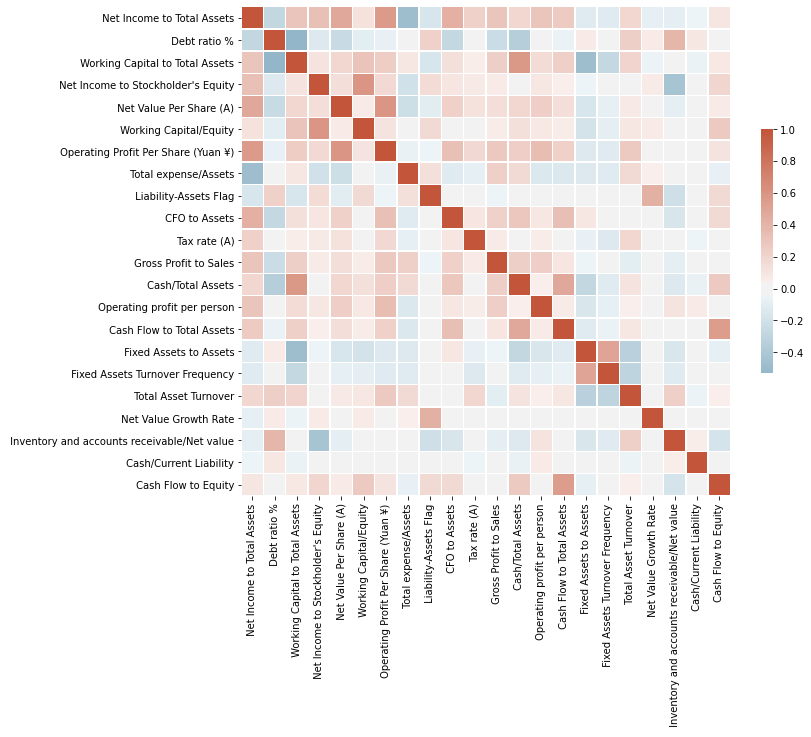

In [975]:
mx = X_train_corr2.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mx,  cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [518]:
from imblearn.over_sampling import RandomOverSampler

In [523]:
def score_model_corr(model, cv = None):
    if cv is None:
        cv = KFold(n_splits=5)
        
    smoter = SMOTE(random_state=0)
    rando = RandomOverSampler(random_state=0)
    scores = []
    for train_fold_index, val_fold_index in cv.split(X_train_corr, y_train):
        X_train_fold, y_train_fold = X_train_corr.iloc[train_fold_index], y_train.iloc[train_fold_index]
        X_val_fold, y_val_fold = X_train_corr.iloc[val_fold_index], y_train.iloc[val_fold_index]
        #X_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(X_train_fold,
        #                                                                y_train_fold)
        X_train_fold_upsample, y_train_fold_upsample = rando.fit_resample(X_train_fold,
                                                                           y_train_fold)
        model_obj = model.fit(X_train_fold_upsample, y_train_fold_upsample)
        #model_obj = model.fit(X_train_fold, y_train_fold)
        score = recall_score(y_val_fold, model_obj.predict(X_val_fold))
        scores.append(score)
    return np.array(scores)

In [900]:
def score_model_corr2(model, cv = None):
    if cv is None:
        cv = KFold(n_splits=5)
        
    smoter = SMOTE(random_state=0)
    rando = RandomOverSampler(random_state=0)
    scores = []
    for train_fold_index, val_fold_index in cv.split(X_train_corr2, y_train):
        X_train_fold, y_train_fold = X_train_corr2.iloc[train_fold_index], y_train.iloc[train_fold_index]
        X_val_fold, y_val_fold = X_train_corr2.iloc[val_fold_index], y_train.iloc[val_fold_index]
        #X_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(X_train_fold,
        #                                                                y_train_fold)
        X_train_fold_upsample, y_train_fold_upsample = rando.fit_resample(X_train_fold,
                                                                           y_train_fold)
        model_obj = model.fit(X_train_fold_upsample, y_train_fold_upsample)
        #model_obj = model.fit(X_train_fold, y_train_fold)
        score = recall_score(y_val_fold, model_obj.predict(X_val_fold))
        scores.append(score)
    return np.array(scores)

In [ ]:
def score_model_over(model, cv = None):
    if cv is None:
        cv = KFold(n_splits=5)
        
    smoter = SMOTE(random_state=0)
    rando = RandomOverSampler(random_state=0)
    scores = []
    for train_fold_index, val_fold_index in cv.split(X_train_corr, y_train):
        X_train_fold, y_train_fold = X_train_corr.iloc[train_fold_index], y_train.iloc[train_fold_index]
        X_val_fold, y_val_fold = X_train_corr.iloc[val_fold_index], y_train.iloc[val_fold_index]
        #X_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(X_train_fold,
        #                                                                y_train_fold)
        X_train_fold_upsample, y_train_fold_upsample = rando.fit_resample(X_train_fold,
                                                                           y_train_fold)
        model_obj = model.fit(X_train_fold_upsample, y_train_fold_upsample)
        #model_obj = model.fit(X_train_fold, y_train_fold)
        score = recall_score(y_val_fold, model_obj.predict(X_val_fold))
        scores.append(score)
    return np.array(scores)

In [502]:
def score_model_corr_conf(model, cv = None):
    if cv is None:
        cv = KFold(n_splits=5)
        
    smoter = SMOTE(random_state=0)
    ran
    scores = []
    for train_fold_index, val_fold_index in cv.split(X_train_corr, y_train):
        X_train_fold, y_train_fold = X_train_corr.iloc[train_fold_index], y_train.iloc[train_fold_index]
        X_val_fold, y_val_fold = X_train_corr.iloc[val_fold_index], y_train.iloc[val_fold_index]
        X_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(X_train_fold,
                                                                           y_train_fold)
        models = []
        x_sets = []
        y_sets = []
        x_sets.append()
        model_obj = model.fit(X_train_fold_upsample, y_train_fold_upsample)
        #model_obj = model.fit(X_train_fold, y_train_fold)
        score = recall_score(y_val_fold, model_obj.predict(X_val_fold))
        scores.append(score)
    return np.array(scores)

In [520]:
#Random Forest
model = RandomForestClassifier(max_depth = 5, min_samples_split=85, random_state=0)
score_model(model)

array([0.82051282, 0.78378378, 0.71794872, 0.89285714, 0.7804878 ])

In [525]:
#Naieve Bayes
clf = make_pipeline(StandardScaler(),
                     BernoulliNB(alpha = 15))
score_model_corr(BernoulliNB(alpha = 5)).mean()

0.8797902163755824

In [526]:
clf = make_pipeline(StandardScaler(),
                     BernoulliNB(alpha = 15))
score_model_corr(BernoulliNB(alpha = .5)).mean()

0.8695067621896891

In [401]:
clf = make_pipeline(StandardScaler(),
                     BernoulliNB(alpha = 15))
score_model_corr(BernoulliNB(alpha = 1))

array([0.8974359 , 0.89189189, 0.87179487, 0.85714286, 0.82926829])

In [406]:
clf = make_pipeline(StandardScaler(),
                     BernoulliNB(alpha = 15))
score_model_corr(BernoulliNB(alpha = .01))

array([0.8974359 , 0.89189189, 0.87179487, 0.85714286, 0.82926829])

In [527]:
print(f'alpha = 1, {score_model_corr(ComplementNB(alpha = 1))}')
print(f'alpha = .5, {score_model_corr(ComplementNB(alpha = .5))}')
print(f'alpha = 5, {score_model_corr(ComplementNB(alpha = 5))}')
print(f'alpha = 10, {score_model_corr(ComplementNB(alpha = 10))}')

alpha = 1, [0.1025641  0.02702703 0.1025641  0.         0.02439024]
alpha = .5, [0.1025641  0.02702703 0.1025641  0.         0.02439024]
alpha = 5, [0.1025641  0.02702703 0.1025641  0.         0.02439024]
alpha = 10, [0.1025641  0.02702703 0.1025641  0.         0.02439024]


In [528]:
from sklearn.naive_bayes import MultinomialNB
print(f'alpha = 1, {score_model_corr(MultinomialNB(alpha = 1))}')
print(f'alpha = .5, {score_model_corr(MultinomialNB(alpha = .5))}')
print(f'alpha = 5, {score_model_corr(MultinomialNB(alpha = 5))}')
print(f'alpha = 10, {score_model_corr(MultinomialNB(alpha = 10))}')

alpha = 1, [0.1025641  0.02702703 0.1025641  0.         0.02439024]
alpha = .5, [0.1025641  0.02702703 0.1025641  0.         0.02439024]
alpha = 5, [0.1025641  0.02702703 0.1025641  0.         0.02439024]
alpha = 10, [0.1025641  0.02702703 0.1025641  0.         0.02439024]


In [529]:
print(f'alpha = 1, {score_model_corr(LogisticRegression(C = 1)).mean()}')
print(f'alpha = .5, {score_model_corr(LogisticRegression(C = .5)).mean()}')
print(f'alpha = 5, {score_model_corr(LogisticRegression(C = .1)).mean()}')
print(f'alpha = 10, {score_model_corr(LogisticRegression(C = .05)).mean()}')

alpha = 1, 0.8714285714285716
alpha = .5, 0.8714285714285716
alpha = 5, 0.8714285714285716
alpha = 10, 0.8714285714285716


In [497]:
print(f'alpha = 1, {score_model_corr(LogisticRegression(C = 1))}')
print(f'alpha = .5, {score_model_corr(LogisticRegression(C = .5))}')
print(f'alpha = 5, {score_model_corr(LogisticRegression(C = .1))}')
print(f'alpha = 10, {score_model_corr(LogisticRegression(C = .05))}')

alpha = 1, [1.         1.         1.         0.35714286 1.        ]
alpha = .5, [1.         1.         1.         0.35714286 1.        ]
alpha = 5, [1.         1.         1.         0.35714286 1.        ]
alpha = 10, [1.         1.         1.         0.35714286 1.        ]


In [540]:
from sklearn.svm import LinearSVC
clf = make_pipeline(StandardScaler(),
                  LinearSVC(random_state=0, tol=1e-5))
score_model(clf)

/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985

array([0.74358974, 0.7027027 , 0.76923077, 0.67857143, 0.6097561 ])

In [545]:
from sklearn.svm import LinearSVC
clf = make_pipeline(StandardScaler(),
                  LinearSVC(random_state=0,penalty='l1',tol=1e-5,dual=False))
score_model(clf)

/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985

array([0.74358974, 0.7027027 , 0.76923077, 0.67857143, 0.63414634])

In [547]:
clf = make_pipeline(StandardScaler(),
                  LinearSVC(random_state=0, tol=1e-5,C=2))
score_model(clf)

/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985

array([0.74358974, 0.7027027 , 0.76923077, 0.67857143, 0.6097561 ])

In [616]:
clf = make_pipeline(StandardScaler(),
                  LinearSVC(random_state=0, tol=1e-5,C=5))
score_model_pca(clf).mean()

/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985

0.8624750990604649

In [618]:
clf = make_pipeline(StandardScaler(),
                  LinearSVC(random_state=0, tol=1e-5,C=5))
score_model_corr(clf).mean()

/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985

0.8097228963082621

In [568]:
model = make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=5))
score_model(model).mean()

0.6533655204386912

# Baseline

In [648]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

In [814]:
def score_model(model, cv = None):
    if cv is None:
        cv = KFold(n_splits=5)
        
    smoter = SMOTE(random_state=0)
    rando = RandomOverSampler(random_state=0)
    scores = {}
    accuracies = []
    recalls = []
    precisions = []
    for train_fold_index, val_fold_index in cv.split(X_train, y_train):
        X_train_fold, y_train_fold = X_train.iloc[train_fold_index], y_train.iloc[train_fold_index]
        X_val_fold, y_val_fold = X_train.iloc[val_fold_index], y_train.iloc[val_fold_index]
        #X_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(X_train_fold,
        #                                                                y_train_fold)
        #X_train_fold_upsample, y_train_fold_upsample = rando.fit_resample(X_train_fold,
        #                                                                 y_train_fold)
        #model_obj = model.fit(X_train_fold_upsample, y_train_fold_upsample)
        model_obj = model.fit(X_train_fold, y_train_fold)
        recall = recall_score(y_val_fold, model_obj.predict(X_val_fold))
        accuracy = accuracy_score(y_val_fold, model_obj.predict(X_val_fold))
        precision = precision_score(y_val_fold, model_obj.predict(X_val_fold))
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
    scores['Accuracy']=np.array(accuracies).mean()
    scores['Recall']=np.array(recalls).mean()
    scores['Precision']=np.array(precisions).mean()
    return scores

In [815]:
logrs = score_model(LogisticRegression(random_state=0))

/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

In [816]:
berts = score_model(BernoulliNB())

In [817]:
svcs = score_model(LinearSVC(random_state=0))

/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985

In [818]:
rfs = score_model(RandomForestClassifier(random_state=0))

In [819]:
gbs = score_model(GradientBoostingClassifier(random_state=0))

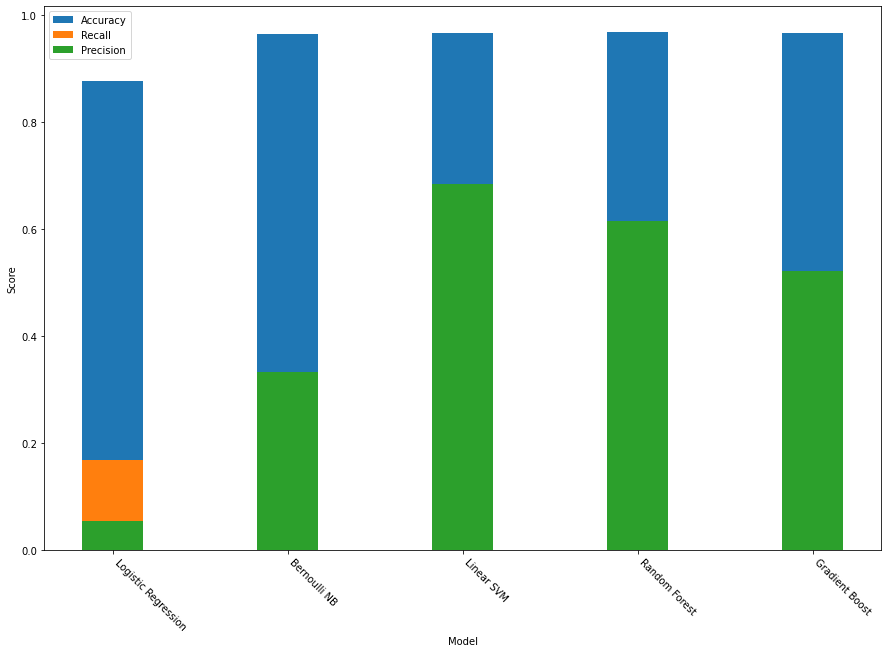

In [738]:
labels = ['Logistic Regression', 'Bernoulli NB', 'Linear SVM', 'Random Forest', 'Gradient Boost']
scores = [logrs,berts,svcs,rfs,gbs]
accs = [dic['Accuracy'] for dic in scores]
recs = [dic['Recall'] for dic in scores]
precs = [dic['Precision'] for dic in scores]

width = .35

fig, ax = plt.subplots(figsize=(15, 10))

ax.bar(labels, accs, width, label='Accuracy')
ax.bar(labels, recs, width, label='Recall')
ax.bar(labels, precs, width, label='Precision')
ax.set_ylabel('Score')
ax.set_xlabel('Model')
plt.xticks(rotation=-45,ha='left')
ax.legend()

plt.show()

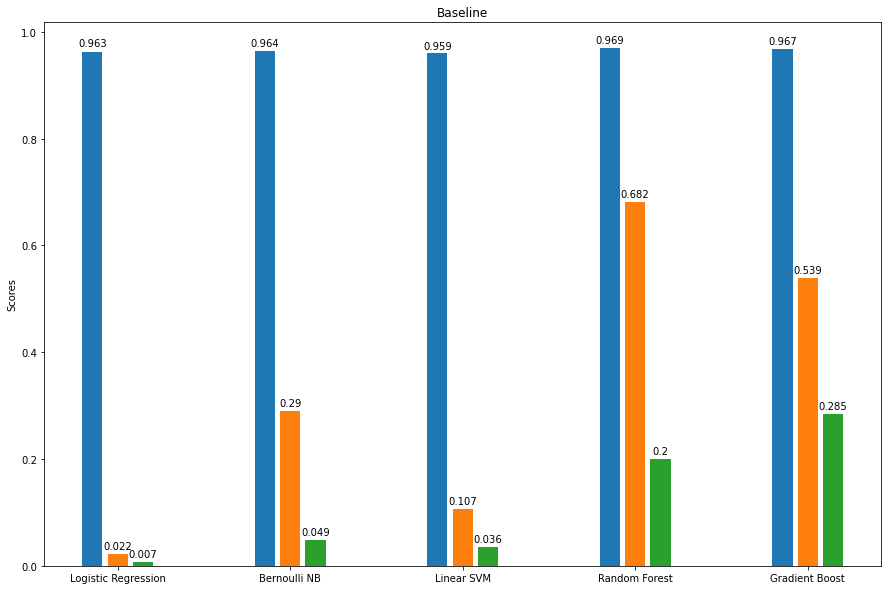

In [870]:
labels = ['Logistic Regression', 'Bernoulli NB', 'Linear SVM', 'Random Forest', 'Gradient Boost']
scores = [logrs,berts,svcs,rfs,gbs]
accs = [dic['Accuracy'] for dic in scores]
recs = [dic['Recall'] for dic in scores]
precs = [dic['Precision'] for dic in scores]

x = np.arange(len(labels))
width = .35

fig, ax = plt.subplots(figsize=(15, 10))

rects1 = ax.bar(x-width/3-.03,accs,width/3,label='Accuracy')
rects2 = ax.bar(x,precs,width/3,label='Precision')
rects3 = ax.bar(x+width/3+.03,recs,width/3,label='Recall')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Baseline')
ax.set_xticks(x)
ax.set_xticklabels(labels)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round(rect.get_height(),3)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# Upsample

In [821]:
def score_model_over(model, cv = None):
    if cv is None:
        cv = KFold(n_splits=5)
        
    smoter = SMOTE(random_state=0)
    rando = RandomOverSampler(random_state=0)
    scores = {}
    accuracies = []
    recalls = []
    precisions = []
    for train_fold_index, val_fold_index in cv.split(X_train, y_train):
        X_train_fold, y_train_fold = X_train.iloc[train_fold_index], y_train.iloc[train_fold_index]
        X_val_fold, y_val_fold = X_train.iloc[val_fold_index], y_train.iloc[val_fold_index]
        #X_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(X_train_fold,
        #                                                                y_train_fold)
        X_train_fold_upsample, y_train_fold_upsample = rando.fit_resample(X_train_fold,
                                                                           y_train_fold)
        model_obj = model.fit(X_train_fold_upsample, y_train_fold_upsample)
        recall = recall_score(y_val_fold, model_obj.predict(X_val_fold))
        accuracy = accuracy_score(y_val_fold, model_obj.predict(X_val_fold))
        precision = precision_score(y_val_fold, model_obj.predict(X_val_fold))
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
    scores['Accuracy']=np.array(accuracies).mean()
    scores['Recall']=np.array(recalls).mean()
    scores['Precision']=np.array(precisions).mean()
    return scores
    return np.array(scores)

In [822]:
lgrs_up = score_model_over(LogisticRegression(random_state=0))

/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

In [823]:
berts_up = score_model_over(BernoulliNB())

In [811]:
score_model_corr(BernoulliNB())

{'Accuracy': 0.6494958753437212,
 'Recall': 0.8695067621896891,
 'Precision': 0.078212540058042}

In [824]:
svcs_up = score_model_over(LinearSVC(random_state=0))

/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985

In [825]:
rfs_up = score_model_over(RandomForestClassifier(random_state=0))

In [826]:
gbs_up = score_model_over(GradientBoostingClassifier(random_state=0))

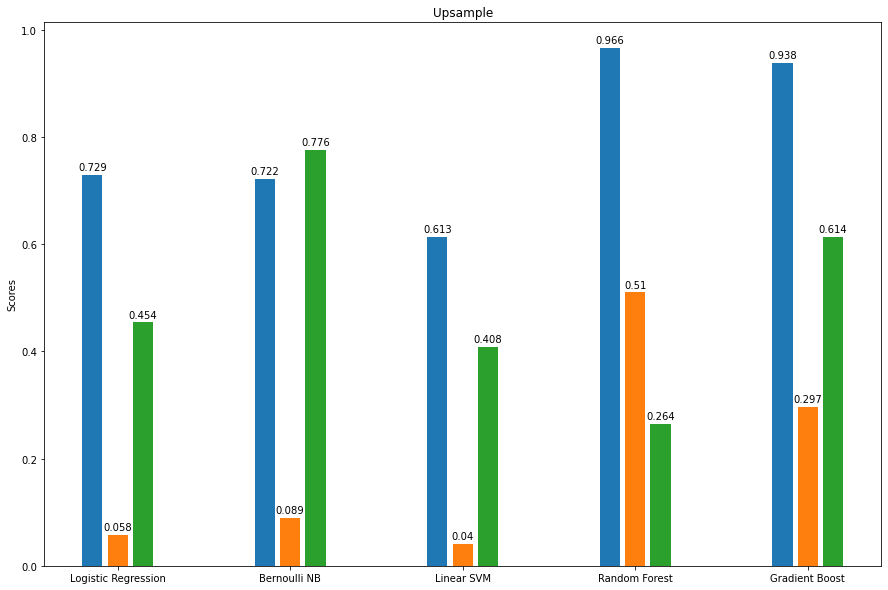

In [871]:
labels = ['Logistic Regression', 'Bernoulli NB', 'Linear SVM', 'Random Forest', 'Gradient Boost']
scores = [lgrs_up,berts_up,svcs_up,rfs_up,gbs_up]
accs = [dic['Accuracy'] for dic in scores]
recs = [dic['Recall'] for dic in scores]
precs = [dic['Precision'] for dic in scores]

x = np.arange(len(labels))
width = .35

fig, ax = plt.subplots(figsize=(15, 10))

rects1 = ax.bar(x-width/3-.03,accs,width/3,label='Accuracy')
rects2 = ax.bar(x,precs,width/3,label='Precision')
rects3 = ax.bar(x+width/3+.03,recs,width/3,label='Recall')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Upsample')
ax.set_xticks(x)
ax.set_xticklabels(labels)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round(rect.get_height(),3)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# PCA

In [831]:
def score_model_pca(model, cv = None):
    if cv is None:
        cv = KFold(n_splits=5)
        
    smoter = SMOTE(random_state=0)
    rando = RandomOverSampler(random_state=0)
    scaler = StandardScaler()
    pca = PCA(n_components = 8)
    scores = {}
    accuracies = []
    recalls = []
    precisions = []
    for train_fold_index, val_fold_index in cv.split(X_train, y_train):
        X_train_fold, y_train_fold = X_train.iloc[train_fold_index], y_train.iloc[train_fold_index]
        X_val_fold, y_val_fold = X_train.iloc[val_fold_index], y_train.iloc[val_fold_index]
        #X_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(X_train_fold,
        #                                                                y_train_fold)
        X_train_fold_upsample, y_train_fold_upsample = rando.fit_resample(X_train_fold,
                                                                           y_train_fold)
        X_train_fold_upsample_scaled = scaler.fit_transform(X_train_fold_upsample)
        X_val_fold_scaled = scaler.transform(X_val_fold)
        X_train_fold_upsample_pca = pca.fit_transform(X_train_fold_upsample_scaled)
        X_val_fold_pca = pca.transform(X_val_fold_scaled)
        model_obj = model.fit(X_train_fold_upsample_pca, y_train_fold_upsample)
        #model_obj = model.fit(X_train_fold, y_train_fold)
        recall = recall_score(y_val_fold, model_obj.predict(X_val_fold_pca))
        accuracy = accuracy_score(y_val_fold, model_obj.predict(X_val_fold_pca))
        precision = precision_score(y_val_fold, model_obj.predict(X_val_fold_pca))
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
    scores['Accuracy']=np.array(accuracies).mean()
    scores['Recall']=np.array(recalls).mean()
    scores['Precision']=np.array(precisions).mean()
    return scores

In [832]:
lgrs_pca = score_model_pca(LogisticRegression(random_state=0))

In [833]:
berts_pca = score_model_pca(BernoulliNB())

In [834]:
svcs_pca = score_model_pca(LinearSVC(random_state=0))

/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985

In [835]:
rfs_pca = score_model_pca(RandomForestClassifier(random_state=0))

In [836]:
gbs_pca = score_model_pca(GradientBoostingClassifier(random_state=0))

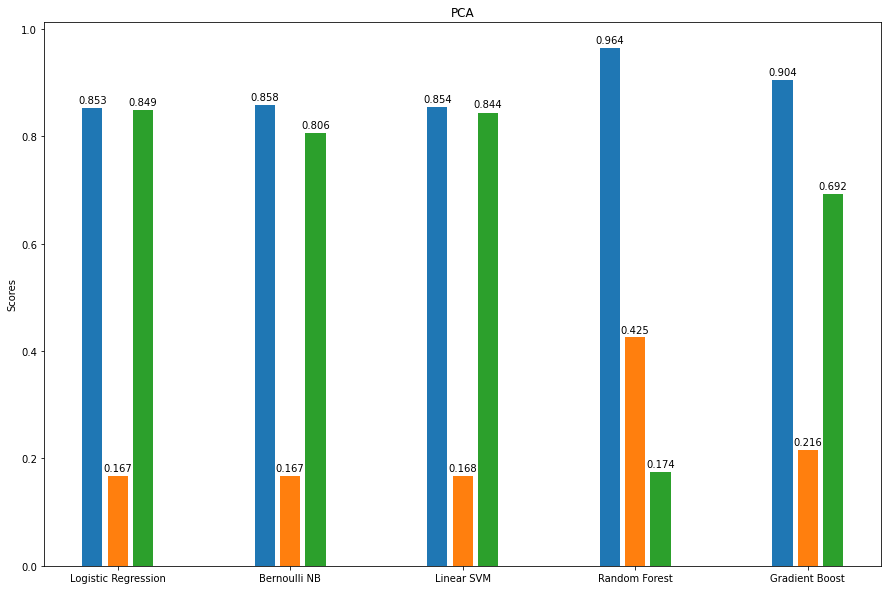

In [873]:
labels = ['Logistic Regression', 'Bernoulli NB', 'Linear SVM', 'Random Forest', 'Gradient Boost']
scores = [lgrs_pca,berts_pca,svcs_pca,rfs_pca,gbs_pca]
accs = [dic['Accuracy'] for dic in scores]
recs = [dic['Recall'] for dic in scores]
precs = [dic['Precision'] for dic in scores]

x = np.arange(len(labels))
width = .35

fig, ax = plt.subplots(figsize=(15, 10))

rects1 = ax.bar(x-width/3-.03,accs,width/3,label='Accuracy')
rects2 = ax.bar(x,precs,width/3,label='Precision')
rects3 = ax.bar(x+width/3+.03,recs,width/3,label='Recall')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('PCA')
ax.set_xticks(x)
ax.set_xticklabels(labels)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round(rect.get_height(),3)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# Correlated Features

In [711]:
def score_model_corr(model, cv = None):
    if cv is None:
        cv = KFold(n_splits=5)
        
    smoter = SMOTE(random_state=0)
    rando = RandomOverSampler(random_state=0)
    scores = {}
    accuracies = []
    recalls = []
    precisions = []
    for train_fold_index, val_fold_index in cv.split(X_train_corr, y_train):
        X_train_fold, y_train_fold = X_train_corr.iloc[train_fold_index], y_train.iloc[train_fold_index]
        X_val_fold, y_val_fold = X_train_corr.iloc[val_fold_index], y_train.iloc[val_fold_index]
        #X_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(X_train_fold,
        #                                                                y_train_fold)
        X_train_fold_upsample, y_train_fold_upsample = rando.fit_resample(X_train_fold,
                                                                           y_train_fold)
        model_obj = model.fit(X_train_fold_upsample, y_train_fold_upsample)
        #model_obj = model.fit(X_train_fold, y_train_fold)
        recall = recall_score(y_val_fold, model_obj.predict(X_val_fold))
        accuracy = accuracy_score(y_val_fold, model_obj.predict(X_val_fold))
        precision = precision_score(y_val_fold, model_obj.predict(X_val_fold))
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
    scores['Accuracy']=np.array(accuracies).mean()
    scores['Recall']=np.array(recalls).mean()
    scores['Precision']=np.array(precisions).mean()
    return scores

In [839]:
lgrs_corr = score_model_corr(LogisticRegression(penalty='l2', random_state=0))

In [767]:
berts_corr = score_model_corr(BernoulliNB())

In [768]:
svcs_corr = score_model_corr(LinearSVC(random_state=0))

/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985

In [769]:
rfs_corr = score_model_corr(RandomForestClassifier(random_state=0))

In [770]:
gbs_corr = score_model_corr(GradientBoostingClassifier(random_state=0))

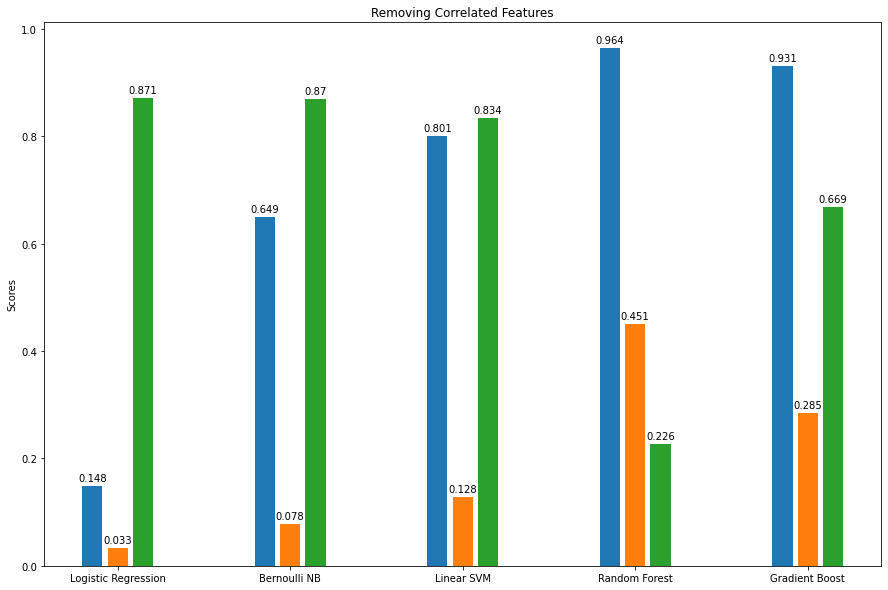

In [874]:
labels = ['Logistic Regression', 'Bernoulli NB', 'Linear SVM', 'Random Forest', 'Gradient Boost']
scores = [lgrs_corr,berts_corr,svcs_corr,rfs_corr,gbs_corr]
accs = [dic['Accuracy'] for dic in scores]
recs = [dic['Recall'] for dic in scores]
precs = [dic['Precision'] for dic in scores]

x = np.arange(len(labels))
width = .35

fig, ax = plt.subplots(figsize=(15, 10))

rects1 = ax.bar(x-width/3-.03,accs,width/3,label='Accuracy')
rects2 = ax.bar(x,precs,width/3,label='Precision')
rects3 = ax.bar(x+width/3+.03,recs,width/3,label='Recall')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Removing Correlated Features')
ax.set_xticks(x)
ax.set_xticklabels(labels)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round(rect.get_height(),3)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

In [905]:
def score_model_corr2(model, cv = None):
    if cv is None:
        cv = KFold(n_splits=5)
        
    smoter = SMOTE(random_state=0)
    rando = RandomOverSampler(random_state=0)
    scores = {}
    accuracies = []
    recalls = []
    precisions = []
    for train_fold_index, val_fold_index in cv.split(X_train_corr2, y_train):
        X_train_fold, y_train_fold = X_train_corr2.iloc[train_fold_index], y_train.iloc[train_fold_index]
        X_val_fold, y_val_fold = X_train_corr2.iloc[val_fold_index], y_train.iloc[val_fold_index]
        #X_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(X_train_fold,
        #                                                                y_train_fold)
        X_train_fold_upsample, y_train_fold_upsample = rando.fit_resample(X_train_fold,
                                                                           y_train_fold)
        model_obj = model.fit(X_train_fold_upsample, y_train_fold_upsample)
        #model_obj = model.fit(X_train_fold, y_train_fold)
        recall = recall_score(y_val_fold, model_obj.predict(X_val_fold))
        accuracy = accuracy_score(y_val_fold, model_obj.predict(X_val_fold))
        precision = precision_score(y_val_fold, model_obj.predict(X_val_fold))
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
    scores['Accuracy']=np.array(accuracies).mean()
    scores['Recall']=np.array(recalls).mean()
    scores['Precision']=np.array(precisions).mean()
    return scores

In [907]:
lgrs_corr2 = score_model_corr2(LogisticRegression(penalty='l2', random_state=0))

In [908]:
berts_corr2 = score_model_corr2(BernoulliNB())

In [909]:
svcs_corr2 = score_model_corr2(LinearSVC(random_state=0))

In [911]:
rfs_corr2 = score_model_corr2(RandomForestClassifier(random_state=0))

In [912]:
gbs_corr2 = score_model_corr2(GradientBoostingClassifier(random_state=0))

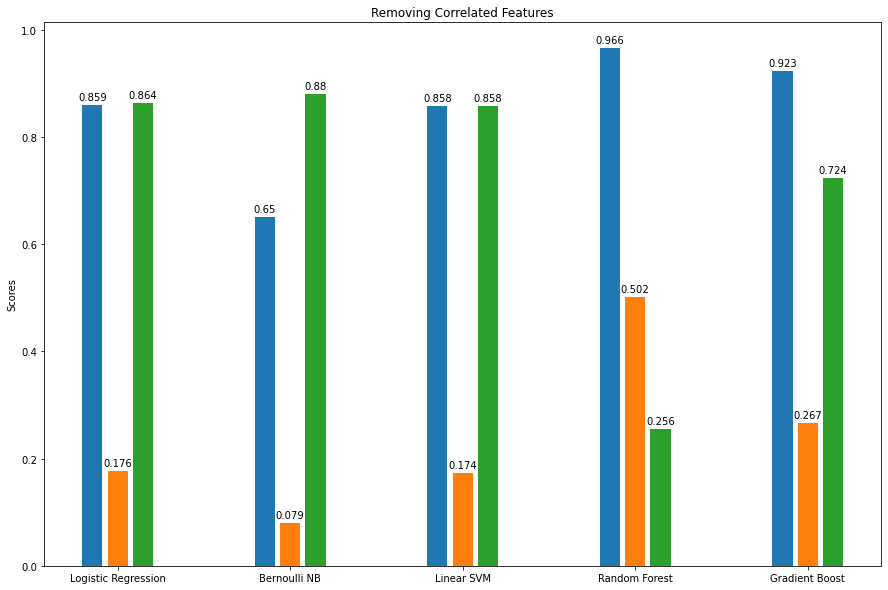

In [913]:
labels = ['Logistic Regression', 'Bernoulli NB', 'Linear SVM', 'Random Forest', 'Gradient Boost']
scores = [lgrs_corr2,berts_corr2,svcs_corr2,rfs_corr2,gbs_corr2]
accs = [dic['Accuracy'] for dic in scores]
recs = [dic['Recall'] for dic in scores]
precs = [dic['Precision'] for dic in scores]

x = np.arange(len(labels))
width = .35

fig, ax = plt.subplots(figsize=(15, 10))

rects1 = ax.bar(x-width/3-.03,accs,width/3,label='Accuracy')
rects2 = ax.bar(x,precs,width/3,label='Precision')
rects3 = ax.bar(x+width/3+.03,recs,width/3,label='Recall')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Removing Correlated Features')
ax.set_xticks(x)
ax.set_xticklabels(labels)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round(rect.get_height(),3)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# PCA on Reduced Features

In [923]:
# PCA on Reduced Features
def score_model_pca_corr(model, cv = None):
    if cv is None:
        cv = KFold(n_splits=5)
        
    smoter = SMOTE(random_state=0)
    rando = RandomOverSampler(random_state=0)
    scaler = StandardScaler()
    pca = PCA(n_components = 1)
    scores = {}
    accuracies = []
    recalls = []
    precisions = []
    for train_fold_index, val_fold_index in cv.split(X_train_corr2, y_train):
        X_train_fold, y_train_fold = X_train_corr2.iloc[train_fold_index], y_train.iloc[train_fold_index]
        X_val_fold, y_val_fold = X_train_corr2.iloc[val_fold_index], y_train.iloc[val_fold_index]
        #X_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(X_train_fold,
        #                                                                y_train_fold)
        X_train_fold_upsample, y_train_fold_upsample = rando.fit_resample(X_train_fold,
                                                                           y_train_fold)
        X_train_fold_upsample_scaled = scaler.fit_transform(X_train_fold_upsample)
        X_val_fold_scaled = scaler.transform(X_val_fold)
        X_train_fold_upsample_pca = pca.fit_transform(X_train_fold_upsample_scaled)
        X_val_fold_pca = pca.transform(X_val_fold_scaled)
        model_obj = model.fit(X_train_fold_upsample_pca, y_train_fold_upsample)
        #model_obj = model.fit(X_train_fold, y_train_fold)
        recall = recall_score(y_val_fold, model_obj.predict(X_val_fold_pca))
        accuracy = accuracy_score(y_val_fold, model_obj.predict(X_val_fold_pca))
        precision = precision_score(y_val_fold, model_obj.predict(X_val_fold_pca))
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
    scores['Accuracy']=np.array(accuracies).mean()
    scores['Recall']=np.array(recalls).mean()
    scores['Precision']=np.array(precisions).mean()
    return scores

In [924]:
lgrs_corr_p = score_model_pca_corr(LogisticRegression( random_state=0))

In [925]:
berts_corr_p = score_model_pca_corr(BernoulliNB())

In [926]:
svcs_corr_p = score_model_pca_corr(LinearSVC(random_state=0))

/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985

In [927]:
rfs_corr_p = score_model_pca_corr(RandomForestClassifier(random_state=0))

In [928]:
gbs_corr_p = score_model_pca_corr(GradientBoostingClassifier(random_state=0))

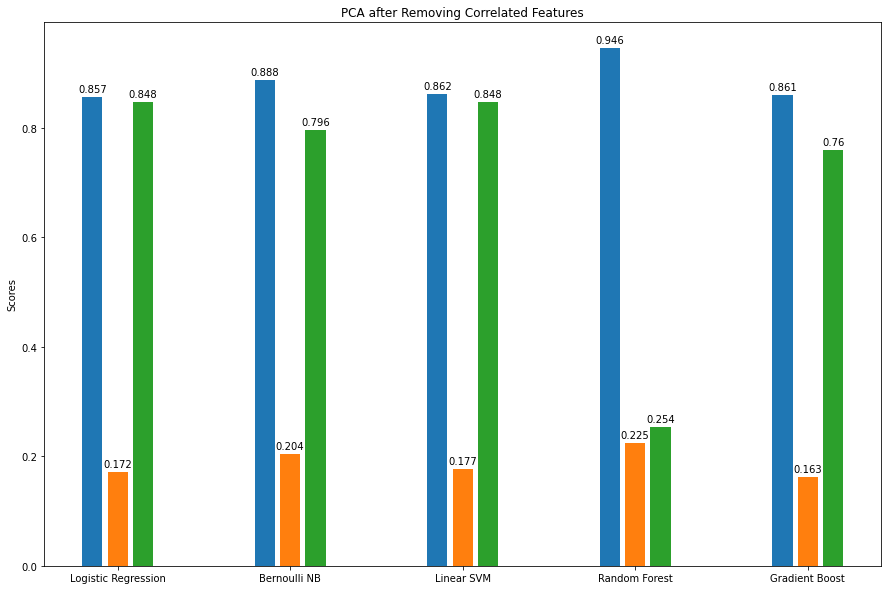

In [929]:
labels = ['Logistic Regression', 'Bernoulli NB', 'Linear SVM', 'Random Forest', 'Gradient Boost']
scores = [lgrs_corr_p,berts_corr_p,svcs_corr_p,rfs_corr_p,gbs_corr_p]
accs = [dic['Accuracy'] for dic in scores]
recs = [dic['Recall'] for dic in scores]
precs = [dic['Precision'] for dic in scores]

x = np.arange(len(labels))
width = .35

fig, ax = plt.subplots(figsize=(15, 10))

rects1 = ax.bar(x-width/3-.03,accs,width/3,label='Accuracy')
rects2 = ax.bar(x,precs,width/3,label='Precision')
rects3 = ax.bar(x+width/3+.03,recs,width/3,label='Recall')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('PCA after Removing Correlated Features')
ax.set_xticks(x)
ax.set_xticklabels(labels)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round(rect.get_height(),3)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# Hyper Parameter Tuning

In [1050]:
#Correlated Tuning
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import make_pipeline, Pipeline
models = {LogisticRegression(random_state=0):{'class__C':[10**i for i in range(-2, 5)]},
          BernoulliNB():{'class__alpha':[1,5,10,15,20]},
             LinearSVC(random_state=0):{'class__C':[10**i for i in range(-2, 5)],'class__loss':['hinge',
                                                                                            'squared_hinge']},
          GradientBoostingClassifier(random_state=0):{'class__learning_rate':[0.005, 0.01,.05], 
                                                'class__n_estimators':[50,100,200,500],'class__max_depth':[3]}}

          
models2 = {RandomForestClassifier(random_state=0):{'class__n_estimators':[100, 200, 500, 1000],'class__max_depth':[4,6,8],
                                    'class__criterion':['entropy']}}


kfolds = KFold(n_splits=5)
rando = RandomOverSampler(random_state=0)
best_models_all_rf = {}

for classifier in models2:
    pipeline = Pipeline([('sampling', rando),('class',classifier)])
    
    best_models_all_rf[classifier] = GridSearchCV(pipeline, models2[classifier], cv = kfolds, scoring = 'recall') 
    
    best_models_all_rf[classifier].fit(X_train_corr2, y_train)
    
summ_all_rf = {}

for k in best_models_all:
    summ_all_rf[k] = [best_models_all_rf[k].best_params_, best_models_all_rf[k].best_score_]

KeyError: LogisticRegression(random_state=0)

In [857]:
for k in best_models_all:
    summ_all[k] = [best_models_all[k].best_params_, best_models_all[k].best_score_]

In [933]:
summ_all

{LogisticRegression(random_state=0): [{'class__C': 0.01}, 0.8818048683902342],
 BernoulliNB(): [{'class__alpha': 1}, 0.8797902163755824],
 LinearSVC(random_state=0): [{'class__C': 0.01, 'class__loss': 'hinge'},
  0.9040821845699896],
 GradientBoostingClassifier(random_state=0): [{'class__learning_rate': 0.005,
   'class__max_depth': 3,
   'class__n_estimators': 500},
  0.806609343194709]}

In [1052]:
for k in best_models_all_rf:
    summ_all_rf[k] = [best_models_all_rf[k].best_params_, best_models_all_rf[k].best_score_]
summ_all_rf

{RandomForestClassifier(random_state=0): [{'class__criterion': 'entropy',
   'class__max_depth': 4,
   'class__n_estimators': 100},
  0.806609343194709]}

In [1054]:
##UpSample Tuning
models = {

          GradientBoostingClassifier(random_state=0):{'class__learning_rate':[0.005, 0.01,.05], 
                                         'class__n_estimators':[50,100,200,500],'class__max_depth':[1,2,3]}}



kfolds = KFold(n_splits=5)
rando = RandomOverSampler(random_state=0)
best_models_all2_gb = {}

for classifier in models:
    pipeline = Pipeline([('sampling', rando),('class',classifier)])
    
    best_models_all2_gb[classifier] = GridSearchCV(pipeline, models[classifier], cv = kfolds, scoring = 'recall') 
    
    best_models_all2_gb[classifier].fit(X_train, y_train)
    
summ_all2_gb = {}

for k in best_models_all2_gb:
    summ_all2_gb[k] = [best_models_all2_gb[k].best_params_, best_models_all2_gb[k].best_score_]

In [864]:
for k in best_models_all2:
    summ_all2[k] = [best_models_all2[k].best_params_, best_models_all2[k].best_score_]
summ_all2

{RandomForestClassifier(random_state=0): [{'class__criterion': 'entropy',
   'class__max_depth': 4,
   'class__n_estimators': 100},
  0.8017312944142212]}

In [936]:
#PCA Tuning
models = {RandomForestClassifier(random_state=0):{'class__n_estimators':[100, 200, 500, 1000],'class__max_depth':[4,6,8],
                                    'class__criterion':['entropy']}}


scaler = StandardScaler()
pca = PCA(n_components = 8)

kfolds = KFold(n_splits=5)
rando = RandomOverSampler(random_state=0)
best_models_all3 = {}
X_scaled = scaler.fit_transform(X_train)
X_pca = pca.fit_transform(X_scaled)
best_models_all32 = {}

for classifier in models:
    pipeline = Pipeline([('sampling', rando),('class',classifier)])
    
    best_models_all32[classifier] = GridSearchCV(pipeline, models[classifier], cv = kfolds, scoring = 'recall') 
    
    best_models_all32[classifier].fit(X_pca, y_train)
    
summ_all32 = {}

for k in best_models_all3:
    summ_all32[k] = [best_models_all32[k].best_params_, best_models_all32[k].best_score_]

/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985

/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985

In [878]:
# Results of PCA tuning
summ_all3

{LogisticRegression(random_state=0): [{'class__C': 0.01}, 0.8487167413996684],
 BernoulliNB(): [{'class__alpha': 10}, 0.8001057610813709],
 LinearSVC(random_state=0): [{'class__C': 0.01, 'class__loss': 'hinge'},
  0.8607376473230133],
 GradientBoostingClassifier(random_state=0): [{'class__learning_rate': 0.005,
   'class__max_depth': 1,
   'class__n_estimators': 50},
  0.8710211015089063]}

In [939]:
for k in best_models_all32:
    summ_all32[k] = [best_models_all32[k].best_params_, best_models_all32[k].best_score_]
summ_all32

{LogisticRegression(random_state=0): [{'class__C': 0.01}, 0.8410023397828276],
 BernoulliNB(): [{'class__alpha': 1}, 0.9703026264001874],
 LinearSVC(random_state=0): [{'class__C': 100, 'class__loss': 'hinge'},
  0.8545547289449729],
 GradientBoostingClassifier(random_state=0): [{'class__learning_rate': 0.005,
   'class__max_depth': 1,
   'class__n_estimators': 50},
  0.8710211015089063]}

In [934]:
# PCA on reduced
#PCA Tuning
models = {
        LogisticRegression(random_state=0):{'class__C':[10**i for i in range(-2, 5)]},
         BernoulliNB():{'class__alpha':[1,5,10,15,20]},
          LinearSVC(random_state=0):{'class__C':[10**i for i in range(-2, 5)],'class__loss':['hinge',
                                                                                            'squared_hinge']},

          GradientBoostingClassifier(random_state=0):{'class__learning_rate':[0.005, 0.01,.05], 
                                                'class__n_estimators':[50,100,200,500],'class__max_depth':[1,2,3]}}



scaler = StandardScaler()
pca = PCA(n_components = 1)

kfolds = KFold(n_splits=5)
rando = RandomOverSampler(random_state=0)
best_models_all3 = {}
X_scaled = scaler.fit_transform(X_train_corr2)
X_pca = pca.fit_transform(X_scaled)
best_models_all4 = {}

for classifier in models:
    pipeline = Pipeline([('sampling', rando),('class',classifier)])
    
    best_models_all4[classifier] = GridSearchCV(pipeline, models[classifier], cv = kfolds, scoring = 'recall') 
    
    best_models_all4[classifier].fit(X_pca, y_train)
    
summ_all4 = {}

for k in best_models_all4:
    summ_all4[k] = [best_models_all4[k].best_params_, best_models_all4[k].best_score_]

/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985

/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985

In [882]:
for k in best_models_all3:
    summ_all4[k] = [best_models_all3[k].best_params_, best_models_all3[k].best_score_]
summ_all4

{LogisticRegression(random_state=0): [{'class__C': 0.01}, 0.8487167413996684],
 BernoulliNB(): [{'class__alpha': 20}, 0.7952277123008831],
 LinearSVC(random_state=0): [{'class__C': 100, 'class__loss': 'hinge'},
  0.8918652101578932],
 GradientBoostingClassifier(random_state=0): [{'class__learning_rate': 0.005,
   'class__max_depth': 1,
   'class__n_estimators': 50},
  0.8710211015089063]}

In [935]:
summ_all4

{LogisticRegression(random_state=0): [{'class__C': 0.01}, 0.8436155802009461],
 BernoulliNB(): [{'class__alpha': 1}, 0.9674392296343516],
 LinearSVC(random_state=0): [{'class__C': 1000, 'class__loss': 'hinge'},
  0.9163802907705347],
 GradientBoostingClassifier(random_state=0): [{'class__learning_rate': 0.005,
   'class__max_depth': 1,
   'class__n_estimators': 50},
  0.8538990343868393]}

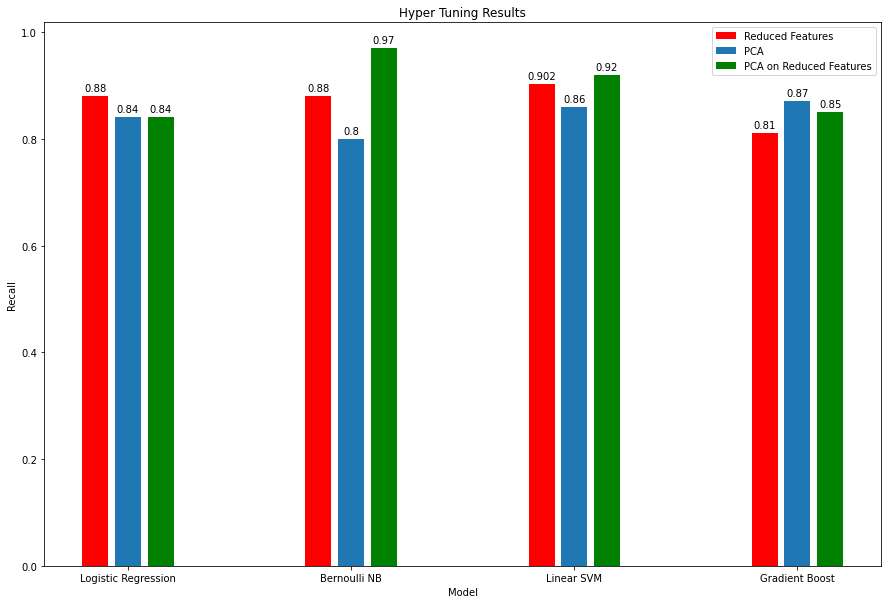

In [988]:
labels = ['Logistic Regression', 'Bernoulli NB', 'Linear SVM', 'Gradient Boost']
scores = [lgrs_corr_p,berts_corr_p,svcs_corr_p,rfs_corr_p,gbs_corr_p]
correlated = [.88,.88,.902,.81]
pca = [.84,.80,.86,.87]
pca_corr = [.84,.97,.92,.85]

x = np.arange(len(labels))
width = .35

fig, ax = plt.subplots(figsize=(15, 10))

rects1 = ax.bar(x-width/3-.03,correlated,width/3,label='Reduced Features',color='red')
rects2 = ax.bar(x,pca,width/3,label='PCA')
rects3 = ax.bar(x+width/3+.03,pca_corr,width/3,label='PCA on Reduced Features',color='green')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Recall')
ax.set_xlabel('Model')
ax.set_title('Hyper Tuning Results')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper right')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round(rect.get_height(),3)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# Testing

In [1015]:
#Reduced Features:
X_test_corr = X_test[X_train_corr2.columns]
X_test_corr.shape

(1364, 17)

In [1016]:
summ_all

{LogisticRegression(random_state=0): [{'class__C': 0.01}, 0.8818048683902342],
 BernoulliNB(): [{'class__alpha': 1}, 0.8797902163755824],
 LinearSVC(random_state=0): [{'class__C': 0.01, 'class__loss': 'hinge'},
  0.9040821845699896],
 GradientBoostingClassifier(random_state=0): [{'class__learning_rate': 0.005,
   'class__max_depth': 3,
   'class__n_estimators': 500},
  0.806609343194709]}

              precision    recall  f1-score   support

           0       1.00      0.63      0.77      1328
           1       0.06      0.89      0.12        36

    accuracy                           0.64      1364
   macro avg       0.53      0.76      0.45      1364
weighted avg       0.97      0.64      0.76      1364



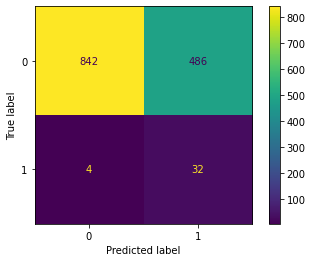

In [1026]:
from sklearn.metrics import classification_report
model = BernoulliNB(alpha=1)
X_over, y_over = rando.fit_resample(X_train_corr2, y_train)
model.fit(X_over,y_over)
preds = model.predict(X_test_corr)
print(classification_report(y_test,preds))
plot_confusion_matrix(model, X_test_corr, y_test)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1328
           1       0.29      0.06      0.09        36

    accuracy                           0.97      1364
   macro avg       0.63      0.53      0.54      1364
weighted avg       0.96      0.97      0.96      1364



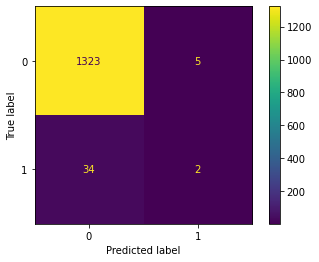

In [1091]:
from sklearn.metrics import classification_report
model = LogisticRegression(random_state=0,C=.1)
model2 = BernoulliNB()
X_over, y_over = rando.fit_resample(X_train_corr2, y_train)
model2.fit(X_train,y_train)
preds = model2.predict(X_test)
print(classification_report(y_test,preds))
plot_confusion_matrix(model2, X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      0.73      0.85      1328
           1       0.08      0.89      0.15        36

    accuracy                           0.74      1364
   macro avg       0.54      0.81      0.50      1364
weighted avg       0.97      0.74      0.83      1364



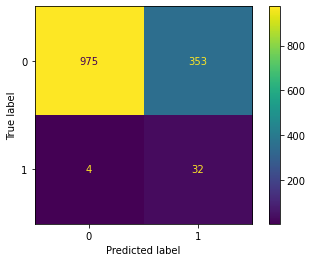

In [1027]:
from sklearn.naive_bayes import BernoulliNB
model = LinearSVC(random_state=)
X_over, y_over = rando.fit_resample(X_train_corr2, y_train)
model.fit(X_over,y_over)
preds = model.predict(X_test_corr)
print(classification_report(y_test,preds))
plot_confusion_matrix(model, X_test_corr, y_test)

              precision    recall  f1-score   support

           0       1.00      0.87      0.93      1328
           1       0.15      0.89      0.26        36

    accuracy                           0.87      1364
   macro avg       0.58      0.88      0.60      1364
weighted avg       0.97      0.87      0.91      1364



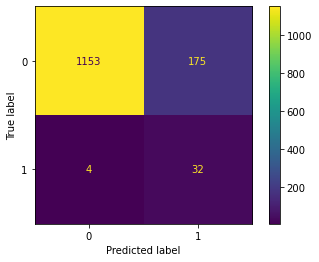

In [1028]:
from sklearn.naive_bayes import BernoulliNB
model =  GradientBoostingClassifier(random_state=0,learning_rate=.005,max_depth=3,
                                   n_estimators = 500)
X_over, y_over = rando.fit_resample(X_train_corr2, y_train)
model.fit(X_over,y_over)
preds = model.predict(X_test_corr)
print(classification_report(y_test,preds))
plot_confusion_matrix(model, X_test_corr, y_test)

              precision    recall  f1-score   support

           0       1.00      0.87      0.93      1328
           1       0.15      0.86      0.26        36

    accuracy                           0.87      1364
   macro avg       0.57      0.87      0.59      1364
weighted avg       0.97      0.87      0.91      1364



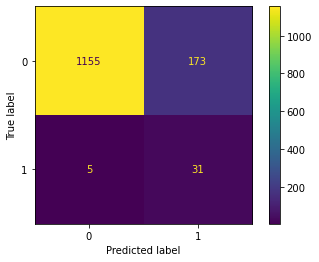

In [1053]:
from sklearn.naive_bayes import BernoulliNB
model =  RandomForestClassifier(random_state=0,criterion=
                               'entropy',max_depth=4,n_estimators=100)
X_over, y_over = rando.fit_resample(X_train_corr2, y_train)
model.fit(X_over,y_over)
preds = model.predict(X_test_corr)
print(classification_report(y_test,preds))
plot_confusion_matrix(model, X_test_corr, y_test)

In [1029]:
#PCA
summ_all3

{LogisticRegression(random_state=0): [{'class__C': 0.01}, 0.8487167413996684],
 BernoulliNB(): [{'class__alpha': 10}, 0.8001057610813709],
 LinearSVC(random_state=0): [{'class__C': 0.01, 'class__loss': 'hinge'},
  0.8607376473230133],
 GradientBoostingClassifier(random_state=0): [{'class__learning_rate': 0.005,
   'class__max_depth': 1,
   'class__n_estimators': 50},
  0.8710211015089063]}

In [1034]:
pca = PCA(n_components = 8)
X_train_scaled = scaler.fit_transform(X_train)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_scaled = scaler.fit_transform(X_test)
X_test_pca = pca.transform(X_test)

              precision    recall  f1-score   support

           0       0.98      0.30      0.46      1328
           1       0.03      0.78      0.06        36

    accuracy                           0.31      1364
   macro avg       0.50      0.54      0.26      1364
weighted avg       0.96      0.31      0.45      1364



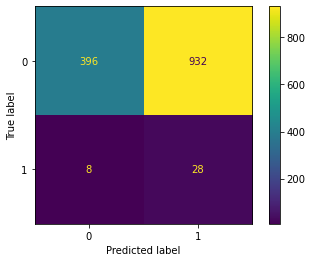

In [1036]:
model =  GradientBoostingClassifier(random_state=0,learning_rate=.005,max_depth=1,
                                   n_estimators = 50)
X_over, y_over = rando.fit_resample(X_train_pca, y_train)
model.fit(X_over,y_over)
preds = model.predict(X_test_pca)
print(classification_report(y_test,preds))
plot_confusion_matrix(model, X_test_pca, y_test)

              precision    recall  f1-score   support

           0       0.99      0.14      0.24      1328
           1       0.03      0.94      0.06        36

    accuracy                           0.16      1364
   macro avg       0.51      0.54      0.15      1364
weighted avg       0.96      0.16      0.24      1364



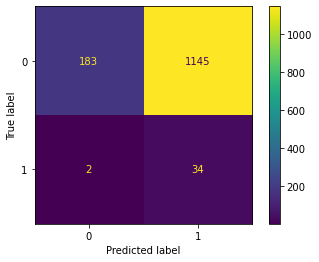

In [1037]:
model =   LinearSVC(random_state=0,C=.01,loss='hinge')
X_over, y_over = rando.fit_resample(X_train_pca, y_train)
model.fit(X_over,y_over)
preds = model.predict(X_test_pca)
print(classification_report(y_test,preds))
plot_confusion_matrix(model, X_test_pca, y_test)

In [ ]:
model =   LinearSVC(random_state=0,C=.01,loss='hinge')
X_over, y_over = rando.fit_resample(X_train_pca, y_train)
model.fit(X_over,y_over)
preds = model.predict(X_test_pca)
print(classification_report(y_test,preds))
plot_confusion_matrix(model, X_test_pca, y_test)

In [1039]:
#PCA on Reduced
pca = PCA(n_components = 1)
X_train_scaled = scaler.fit_transform(X_train_corr2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_scaled = scaler.fit_transform(X_test_corr)
X_test_pca = pca.transform(X_test_scaled)

              precision    recall  f1-score   support

           0       0.99      0.80      0.89      1328
           1       0.10      0.83      0.18        36

    accuracy                           0.80      1364
   macro avg       0.55      0.82      0.54      1364
weighted avg       0.97      0.80      0.87      1364



/Users/gmurphy794/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


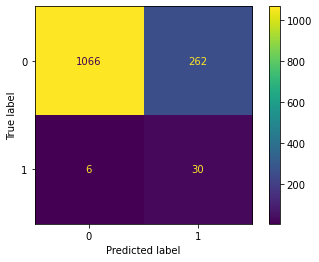

In [1042]:
model = LinearSVC(random_state=0,C=100,loss='hinge')
X_over, y_over = rando.fit_resample(X_train_pca, y_train)
model.fit(X_over,y_over)
preds = model.predict(X_test_pca)
print(classification_report(y_test,preds))
plot_confusion_matrix(model, X_test_pca, y_test)

              precision    recall  f1-score   support

           0       1.00      0.53      0.69      1328
           1       0.05      0.92      0.10        36

    accuracy                           0.54      1364
   macro avg       0.52      0.72      0.39      1364
weighted avg       0.97      0.54      0.68      1364



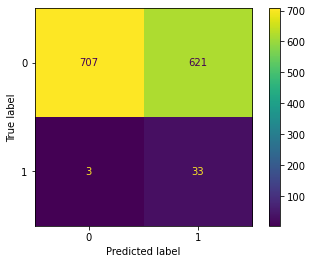

In [1044]:
model = BernoulliNB()
X_over, y_over = rando.fit_resample(X_train_pca, y_train)
model.fit(X_over,y_over)
preds = model.predict(X_test_pca)
print(classification_report(y_test,preds))
plot_confusion_matrix(model, X_test_pca, y_test)

              precision    recall  f1-score   support

           0       0.99      0.80      0.89      1328
           1       0.10      0.83      0.18        36

    accuracy                           0.80      1364
   macro avg       0.55      0.82      0.54      1364
weighted avg       0.97      0.80      0.87      1364



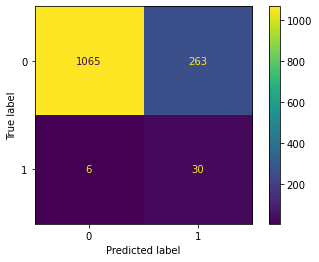

In [1045]:
# Gradient Boosting
model = GradientBoostingClassifier(random_state=0, learning_rate=.005, max_depth=1,
                                  n_estimators=50)

X_over, y_over = rando.fit_resample(X_train_pca, y_train)
model.fit(X_over,y_over)
preds = model.predict(X_test_pca)

print(classification_report(y_test,preds))
plot_confusion_matrix(model, X_test_pca, y_test)

              precision    recall  f1-score   support

           0       1.00      0.87      0.93      1328
           1       0.16      0.89      0.27        36

    accuracy                           0.87      1364
   macro avg       0.58      0.88      0.60      1364
weighted avg       0.97      0.87      0.91      1364



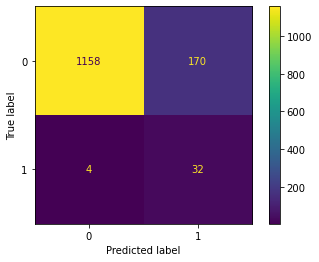

In [1060]:
# Random Forest
model = RandomForestClassifier(random_state=0,criterion=
                               'entropy',max_depth=4,n_estimators=100)
X_over, y_over = rando.fit_resample(X_train, y_train)
model.fit(X_over,y_over)
preds = model.predict(X_test)
print(classification_report(y_test,preds))
plot_confusion_matrix(model, X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      0.81      0.89      1328
           1       0.11      0.89      0.20        36

    accuracy                           0.81      1364
   macro avg       0.55      0.85      0.55      1364
weighted avg       0.97      0.81      0.87      1364



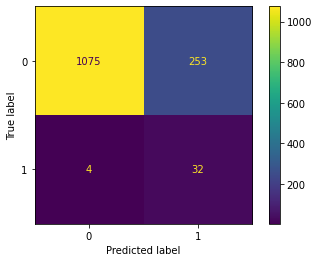

In [1059]:
# Gradient Boosting with more trees
model = GradientBoostingClassifier(random_state=0,learning_rate=.005,max_depth=1,n_estimators=200)
X_over, y_over = rando.fit_resample(X_train, y_train)
model.fit(X_over,y_over)
preds = model.predict(X_test)
print(classification_report(y_test,preds))
plot_confusion_matrix(model, X_test, y_test)

In [1057]:
summ_all2_gb

{GradientBoostingClassifier(random_state=0): [{'class__learning_rate': 0.005,
   'class__max_depth': 1,
   'class__n_estimators': 200},
  0.8328047693901353]}

# Coefficients

In [1069]:
feature_importances = pd.DataFrame(model.feature_importances_,X_test.columns)

In [1073]:
feature_importances.sort_values(by=0,ascending=False)[:20]

,0
Net Income to Total Assets,0.081795
Continuous interest rate (after tax),0.051123
Total income/Total expense,0.050013
Persistent EPS in the Last Four Seasons,0.047833
Retained Earnings to Total Assets,0.043538
Net profit before tax/Paid-in capital,0.043188
ROA(B) before interest and depreciation after tax,0.041493
Per Share Net profit before tax (Yuan ¥),0.040119
Borrowing dependency,0.037281
Equity to Liability,0.036717


In [1085]:
cor_import = pd.DataFrame(cor_target2.sort_values(ascending=False))
cor_import.rename(columns={'Bankrupt?':'Target Correlation'},inplace=True)
cor_import[:10]

,Target Correlation
Net Income to Total Assets,0.330575
Debt ratio %,0.251671
Working Capital to Total Assets,0.200695
Net Income to Stockholder's Equity,0.195255
Net Value Per Share (A),0.169483
Working Capital/Equity,0.151153
Operating Profit Per Share (Yuan ¥),0.149077
Total expense/Assets,0.147447
Liability-Assets Flag,0.135124
CFO to Assets,0.124464


In [1082]:
common = []
for x in top_22.index:
    if x in cor_import.index:
        common.append(x)
common

[' Net Income to Total Assets', ' Net Value Growth Rate', ' Debt ratio %']

In [1077]:
len(common)

22

In [1083]:
top_22 = feature_importances.sort_values(by=0,ascending=False)[:22]
top_22.rename(columns={0:'Importance'},inplace=True)
top_22

,Importance
Net Income to Total Assets,0.081795
Continuous interest rate (after tax),0.051123
Total income/Total expense,0.050013
Persistent EPS in the Last Four Seasons,0.047833
Retained Earnings to Total Assets,0.043538
Net profit before tax/Paid-in capital,0.043188
ROA(B) before interest and depreciation after tax,0.041493
Per Share Net profit before tax (Yuan ¥),0.040119
Borrowing dependency,0.037281
Equity to Liability,0.036717


In [1084]:
top_22[:10]

,Importance
Net Income to Total Assets,0.081795
Continuous interest rate (after tax),0.051123
Total income/Total expense,0.050013
Persistent EPS in the Last Four Seasons,0.047833
Retained Earnings to Total Assets,0.043538
Net profit before tax/Paid-in capital,0.043188
ROA(B) before interest and depreciation after tax,0.041493
Per Share Net profit before tax (Yuan ¥),0.040119
Borrowing dependency,0.037281
Equity to Liability,0.036717


In [1103]:
fdf = top_22.join(cor_target,how='left')
fdf.rename(columns={'Bankrupt?':'Target Correlation'},inplace=True)
fdf[:10]

,Importance,Target Correlation
Net Income to Total Assets,0.081795,0.330575
Continuous interest rate (after tax),0.051123,0.007911
Total income/Total expense,0.050013,0.007122
Persistent EPS in the Last Four Seasons,0.047833,0.226261
Retained Earnings to Total Assets,0.043538,0.223314
Net profit before tax/Paid-in capital,0.043188,0.213938
ROA(B) before interest and depreciation after tax,0.041493,0.284716
Per Share Net profit before tax (Yuan ¥),0.040119,0.206021
Borrowing dependency,0.037281,0.177929
Equity to Liability,0.036717,0.082661
